# Welcome to the Detective's Quest: Unraveling the Money Laundering Syndicate

Welcome, Detective! The king of **Valdris (K1)** has summoned you to investigate a cunning money laundering syndicate in **Goldweave Port (C5)**. Wielding the arcane art of **synthetic data**, you’ll conjure realistic, privacy-safe datasets—mimicking financial transactions, documents, and reports—without exposing sensitive information.

In this quest, you will:
- **Conjure transaction ledgers** to trace illicit financial flows (Mission 1).
- **Forge bank statements and reports** to uncover suspicious activities (Mission 2).
- **Train a mystical familiar** to detect anomalies in transaction networks (Mission 3).
- **Summon a golem** to query evidence and reveal syndicate secrets (Mission 4).

Through four missions, you’ll work with synthetic data tools to create accurate, privacy-preserving synthetic data. Your work will expose the K1C5 syndicate’s schemes (e.g., structured deposits) while demonstrating the ethical power of synthetic data in AML investigations.

Embark on this quest to restore justice to Goldweave Port, using synthetic data to outsmart the syndicate!

## Mission 1: Conjuring Financial Flow Projections
**Objective**: Generate synthetic transactional databases using various methods to simulate the movement of money, enabling the tracing of illicit financial flows in a fantasy kingdom setting.




🏰 FANTASY KINGDOM AML - MISSION 1: Synthetic Data Generation

Step 1: Generating Transaction Data...
Generated 3359 transactions (5.0% money laundering)
K1C5 transactions: 518

Step 2: Initializing Synthesis Engine...

Step 3: Preparing Metadata...
Prepared metadata for 14 columns

Step 4: Synthesizing Data...
Synthesizing with Gaussian Copula...
Generated 1000 transactions
Synthesizing with CTGAN...
Generated 1000 transactions
Synthesizing with TVAE...
Generated 1000 transactions
Synthesizing with Graph Network...
Generated 1000 transactions, 500 nodes, 993 edges

Step 5: Evaluating Quality...

🔍 Quality Assessment

Evaluating GAUSSIAN_COPULA:
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 605.33it/s]|
Column Shapes Score: 94.0%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 506.31it/s]|
Column Pair Trends Score: 85.81%

Overall Score (Average): 89.9%

Overall Score: 0.899

Evaluating CTGAN:
Generating report ...

(1/2)

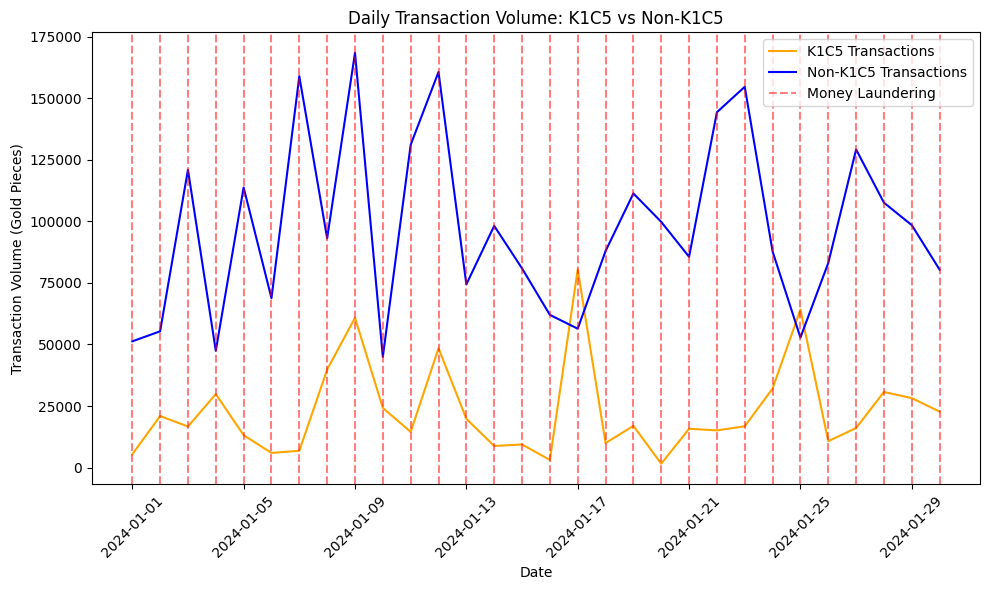


Step 10: Visualizing Transaction Network...


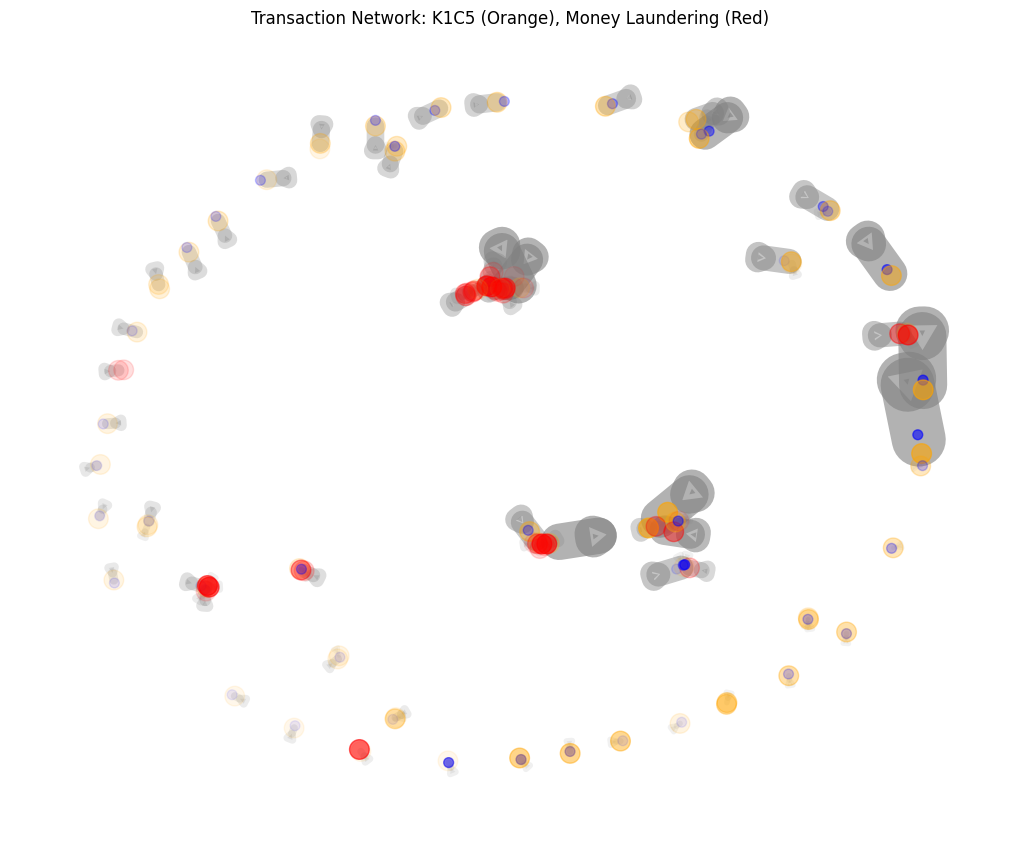


Mission 1 Complete!
Original Data: 3,359 transactions
Best Method: GAUSSIAN_COPULA
Final Dataset: 1,000 transactions
Money Laundering Cases: 155
K1C5 Involvement: 184
Network: 414 customers, 197 merchants
Time Range: 2024-01-01 00:00:34 to 2024-01-30 23:11:39
Data saved to 'mission1_synthetic_data.csv'
Visualizations saved to 'mission1_timeseries.png' and 'mission1_network.png'

Ready for Mission 2: Model Training


In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def create_base_transaction_data(n_samples=3000, ml_ratio=0.05):
    """Generate synthetic financial transactions with money laundering patterns."""
    np.random.seed(42)
    kingdoms = ['K1', 'K2', 'K3', 'K4']
    cities = ['C1', 'C2', 'C3', 'C4', 'C5']
    all_locations = [f"{k}{c}" for k in kingdoms for c in cities]
    common_locations = [loc for loc in all_locations if loc != 'K1C5']
    high_risk_locations = ['K1C5']
    monitored_locations = ['K2C5', 'K3C1', 'K4C3']

    def select_location(is_ml=False, typology=None):
        probs = [0.94, 0.05, 0.01] if not is_ml else [0.3, 0.3, 0.4] if typology != 'layering' else [0.2, 0.3, 0.5]
        category = np.random.choice(['common', 'monitored', 'high_risk'], p=probs)
        locations = {'common': common_locations, 'monitored': monitored_locations, 'high_risk': high_risk_locations}
        return np.random.choice(locations[category])

    data = {
        'transaction_id': [], 'amount': [], 'account_age_days': [], 'transaction_hour': [], 'day_of_week': [],
        'transactions_last_24h': [], 'account_balance_ratio': [], 'merchant_risk_score': [], 'cross_border': [],
        'cash_equivalent': [], 'transaction_type': [], 'customer_segment': [], 'sender_location': [],
        'receiver_location': [], 'is_money_laundering': []
    }

    n_legit = int(n_samples * (1 - ml_ratio))
    for i in range(n_legit):
        data['transaction_id'].append(f'TXN_{i+1:06d}')
        data['amount'].append(np.random.lognormal(mean=6, sigma=2))
        data['account_age_days'].append(int(np.random.gamma(shape=2, scale=365)))
        data['transaction_hour'].append(np.random.randint(0, 24))
        data['day_of_week'].append(np.random.randint(0, 7))
        data['transactions_last_24h'].append(np.random.poisson(2))
        data['account_balance_ratio'].append(np.random.beta(2, 5))
        data['merchant_risk_score'].append(np.random.beta(2, 8))
        data['cross_border'].append(np.random.choice([0, 1], p=[0.9, 0.1]))
        data['cash_equivalent'].append(np.random.choice([0, 1], p=[0.95, 0.05]))
        data['transaction_type'].append(np.random.choice(
            ['wire_transfer', 'card_payment', 'atm_withdrawal', 'online_transfer', 'check_deposit', 'cash_deposit'],
            p=[0.15, 0.35, 0.15, 0.25, 0.05, 0.05]))
        data['customer_segment'].append(np.random.choice(
            ['retail', 'business', 'premium', 'corporate'], p=[0.6, 0.2, 0.15, 0.05]))
        sender = select_location()
        receiver = select_location()
        data['sender_location'].append(sender)
        data['receiver_location'].append(receiver)
        data['cross_border'][-1] = 1 if sender[:2] != receiver[:2] else 0
        data['is_money_laundering'].append(0)

    n_ml_base = int(n_samples * ml_ratio)
    for i in range(n_ml_base):
        typology = np.random.choice(['structuring', 'layering', 'integration'], p=[0.4, 0.4, 0.2])
        base_amount = np.random.lognormal(mean=6, sigma=2) * np.random.uniform(3, 15)
        account_age = int(np.random.gamma(shape=2, scale=365))
        day_of_week = np.random.randint(0, 7)
        merchant_risk = np.random.beta(8, 2)
        transaction_type = np.random.choice(['wire_transfer', 'cash_deposit', 'online_transfer'], p=[0.6, 0.3, 0.1])
        customer_segment = np.random.choice(['retail', 'business', 'premium', 'corporate'], p=[0.6, 0.2, 0.15, 0.05])
        sender = select_location(is_ml=True, typology=typology)
        receiver = select_location(is_ml=True, typology=typology)
        if np.random.random() < 0.7:
            sender, receiver = ('K1C5', receiver) if np.random.random() < 0.5 else (sender, 'K1C5')
        cross_border = 1 if sender[:2] != receiver[:2] else 0
        account_balance_ratio = np.random.beta(2, 5)

        if typology == 'structuring':
            n_splits = np.random.randint(3, 10)
            split_amounts = np.full(n_splits, base_amount / n_splits) + np.random.normal(0, base_amount * 0.05, n_splits)
            split_amounts = np.maximum(split_amounts, 1)
            base_hour = np.random.choice([0, 1, 2, 3, 22, 23]) if np.random.random() < 0.6 else np.random.randint(0, 24)
            hours = np.sort(np.random.randint(base_hour - 12, base_hour + 12, n_splits) % 24)
            for j in range(n_splits):
                amount = round(split_amounts[j], -2) if np.random.random() < 0.7 else split_amounts[j]
                data['transaction_id'].append(f'TXN_{len(data["transaction_id"])+1:06d}')
                data['amount'].append(amount)
                data['account_age_days'].append(account_age)
                data['transaction_hour'].append(hours[j])
                data['day_of_week'].append(day_of_week)
                data['transactions_last_24h'].append(n_splits)
                data['account_balance_ratio'].append(account_balance_ratio)
                data['merchant_risk_score'].append(merchant_risk)
                data['cross_border'].append(cross_border)
                data['cash_equivalent'].append(np.random.choice([0, 1], p=[0.6, 0.4]))
                data['transaction_type'].append('cash_deposit' if np.random.random() < 0.5 else transaction_type)
                data['customer_segment'].append(customer_segment)
                data['sender_location'].append(sender)
                data['receiver_location'].append(receiver)
                data['is_money_laundering'].append(1)
        elif typology == 'layering':
            amount = round(base_amount, -2) if np.random.random() < 0.7 else base_amount
            hour = np.random.choice([0, 1, 2, 3, 22, 23]) if np.random.random() < 0.6 else np.random.randint(0, 24)
            if sender[:2] == receiver[:2]:
                receiver = select_location(is_ml=True, typology=typology)
            data['transaction_id'].append(f'TXN_{len(data["transaction_id"])+1:06d}')
            data['amount'].append(amount)
            data['account_age_days'].append(account_age)
            data['transaction_hour'].append(hour)
            data['day_of_week'].append(day_of_week)
            data['transactions_last_24h'].append(np.random.randint(5, 15))
            data['account_balance_ratio'].append(account_balance_ratio)
            data['merchant_risk_score'].append(merchant_risk * 1.2)
            data['cross_border'].append(1)
            data['cash_equivalent'].append(0)
            data['transaction_type'].append('wire_transfer' if np.random.random() < 0.7 else 'online_transfer')
            data['customer_segment'].append(customer_segment)
            data['sender_location'].append(sender)
            data['receiver_location'].append(receiver)
            data['is_money_laundering'].append(1)
        else:  # integration
            amount = round(base_amount * np.random.uniform(0.8, 1.2), -2) if np.random.random() < 0.5 else base_amount
            data['transaction_id'].append(f'TXN_{len(data["transaction_id"])+1:06d}')
            data['amount'].append(amount)
            data['account_age_days'].append(account_age)
            data['transaction_hour'].append(np.random.randint(0, 24))
            data['day_of_week'].append(day_of_week)
            data['transactions_last_24h'].append(np.random.randint(1, 5))
            data['account_balance_ratio'].append(account_balance_ratio)
            data['merchant_risk_score'].append(np.random.beta(2, 8))
            data['cross_border'].append(np.random.choice([0, 1], p=[0.7, 0.3]))
            data['cash_equivalent'].append(1)
            data['transaction_type'].append(np.random.choice(['check_deposit', 'cash_deposit'], p=[0.6, 0.4]))
            data['customer_segment'].append('business' if np.random.random() < 0.6 else customer_segment)
            data['sender_location'].append(sender)
            data['receiver_location'].append(receiver)
            data['is_money_laundering'].append(1)

    df = pd.DataFrame(data)
    print(f"Generated {len(df)} transactions ({ml_ratio*100:.1f}% money laundering)")
    print(f"K1C5 transactions: {((df['sender_location'] == 'K1C5') | (df['receiver_location'] == 'K1C5')).sum()}")
    return df

class SDVSynthesizerEngine:
    """Generate synthetic data using multiple algorithms for AML investigation."""
    def __init__(self):
        self.synthesizers = {}
        self.results = {}

    def prepare_metadata(self, df):
        """Prepare SDV metadata for synthetic data generation."""
        from sdv.metadata import SingleTableMetadata
        df_clean = df.drop('transaction_id', axis=1)
        metadata = SingleTableMetadata()
        metadata.detect_from_dataframe(df_clean)
        categorical_cols = ['transaction_type', 'customer_segment', 'cross_border', 'cash_equivalent', 
                           'is_money_laundering', 'day_of_week', 'sender_location', 'receiver_location']
        numerical_cols = ['amount', 'account_age_days', 'transaction_hour', 'transactions_last_24h', 
                         'account_balance_ratio', 'merchant_risk_score']
        for col in categorical_cols:
            if col in df_clean.columns:
                metadata.update_column(col, sdtype='categorical')
        for col in numerical_cols:
            if col in df_clean.columns:
                metadata.update_column(col, sdtype='numerical')
        print(f"Prepared metadata for {len(df_clean.columns)} columns")
        return df_clean, metadata

    def synthesize_with_gaussian_copula(self, df, metadata, n_samples=1000):
        """Generate synthetic data using Gaussian Copula."""
        from sdv.single_table import GaussianCopulaSynthesizer
        print("Synthesizing with Gaussian Copula...")
        try:
            synthesizer = GaussianCopulaSynthesizer(metadata)
            synthesizer.fit(df)
            synthetic_data = synthesizer.sample(num_rows=n_samples)
            self.synthesizers['gaussian_copula'] = synthesizer
            self.results['gaussian_copula'] = synthetic_data
            print(f"Generated {len(synthetic_data)} transactions")
            return synthetic_data
        except Exception as e:
            print(f"Gaussian Copula failed: {e}")
            return None

    def synthesize_with_ctgan(self, df, metadata, n_samples=1000, epochs=50):
        """Generate synthetic data using CTGAN."""
        from sdv.single_table import CTGANSynthesizer
        print("Synthesizing with CTGAN...")
        try:
            synthesizer = CTGANSynthesizer(metadata, epochs=epochs, batch_size=500, verbose=False)
            synthesizer.fit(df)
            synthetic_data = synthesizer.sample(num_rows=n_samples)
            self.synthesizers['ctgan'] = synthesizer
            self.results['ctgan'] = synthetic_data
            print(f"Generated {len(synthetic_data)} transactions")
            return synthetic_data
        except Exception as e:
            print(f"CTGAN failed: {e}")
            return None

    def synthesize_with_tvae(self, df, metadata, n_samples=1000, epochs=50):
        """Generate synthetic data using TVAE."""
        from sdv.single_table import TVAESynthesizer
        print("Synthesizing with TVAE...")
        try:
            synthesizer = TVAESynthesizer(metadata, epochs=epochs, batch_size=500, verbose=False)
            synthesizer.fit(df)
            synthetic_data = synthesizer.sample(num_rows=n_samples)
            self.synthesizers['tvae'] = synthesizer
            self.results['tvae'] = synthetic_data
            print(f"Generated {len(synthetic_data)} transactions")
            return synthetic_data
        except Exception as e:
            print(f"TVAE failed: {e}")
            return None

    def synthesize_with_graph_network(self, df, metadata, n_samples=1000, n_nodes=500):
        """Generate synthetic data using network-based approach."""
        print("Synthesizing with Graph Network...")
        try:
            G = nx.DiGraph()
            np.random.seed(42)
            n_customers = n_nodes // 2
            n_merchants = n_nodes - n_customers
            customers = [f'CUST_{i:05d}' for i in range(1, n_customers + 1)]
            merchants = [f'MERCH_{i:04d}' for i in range(1, n_merchants + 1)]
            all_locations = list(set(df['sender_location'].unique()) | set(df['receiver_location'].unique()))
            for customer in customers:
                location = 'K1C5' if np.random.random() < 0.3 else np.random.choice(
                    [loc for loc in all_locations if loc != 'K1C5'] or all_locations)
                G.add_node(customer, type='customer', location=location)
            for merchant in merchants:
                location = 'K1C5' if np.random.random() < 0.25 else np.random.choice(
                    [loc for loc in all_locations if loc != 'K1C5'] or all_locations)
                G.add_node(merchant, type='merchant', location=location)

            customers_k1c5 = [n for n, d in G.nodes(data=True) if d['type'] == 'customer' and d['location'] == 'K1C5'] or customers[:5]
            merchants_k1c5 = [n for n, d in G.nodes(data=True) if d['type'] == 'merchant' and d['location'] == 'K1C5'] or merchants[:5]
            customers_other = [n for n, d in G.nodes(data=True) if d['type'] == 'customer' and d['location'] != 'K1C5'] or customers[5:]
            merchants_other = [n for n, d in G.nodes(data=True) if d['type'] == 'merchant' and d['location'] != 'K1C5'] or merchants[5:]

            edges = []
            ml_ratio = df['is_money_laundering'].mean()
            for _ in range(n_samples):
                is_ml = np.random.random() < ml_ratio
                if is_ml and np.random.random() < 0.7:
                    sender = np.random.choice(customers_k1c5) if np.random.random() < 0.5 else np.random.choice(customers_k1c5 + customers_other)
                    receiver = np.random.choice(merchants_k1c5) if sender not in customers_k1c5 else np.random.choice(merchants_k1c5 + merchants_other)
                else:
                    sender = np.random.choice(customers)
                    receiver = np.random.choice(merchants)
                sender_location = G.nodes[sender]['location']
                receiver_location = G.nodes[receiver]['location']
                cross_border = 1 if sender_location[:2] != receiver_location[:2] else 0
                amount = np.random.lognormal(mean=7 if is_ml else 6, sigma=2)
                transaction_type = np.random.choice(
                    ['wire_transfer', 'cash_deposit', 'online_transfer'], p=[0.6, 0.3, 0.1]
                ) if is_ml else np.random.choice(df['transaction_type'].unique(), 
                    p=df['transaction_type'].value_counts(normalize=True))
                merchant_risk_score = np.random.beta(8, 2) if is_ml else np.random.beta(2, 8)
                edge_data = {
                    'amount': max(1, amount), 'transaction_type': transaction_type, 'cross_border': cross_border,
                    'is_money_laundering': int(is_ml), 'account_age_days': int(np.random.gamma(shape=2, scale=365)),
                    'transaction_hour': np.random.randint(0, 24), 'day_of_week': np.random.randint(0, 7),
                    'transactions_last_24h': np.random.poisson(5 if is_ml else 2),
                    'account_balance_ratio': np.random.beta(2, 5), 'merchant_risk_score': merchant_risk_score,
                    'cash_equivalent': np.random.choice([0, 1], p=[0.6, 0.4] if is_ml else [0.95, 0.05]),
                    'customer_segment': np.random.choice(df['customer_segment'].unique(), 
                        p=df['customer_segment'].value_counts(normalize=True)),
                    'sender_location': sender_location, 'receiver_location': receiver_location
                }
                edges.append(edge_data)
                G.add_edge(sender, receiver, **edge_data)

            synthetic_data = pd.DataFrame(edges)[[col for col in df.columns if col != 'transaction_id']]
            self.synthesizers['graph_network'] = G
            self.results['graph_network'] = synthetic_data
            print(f"Generated {len(synthetic_data)} transactions, {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
            return synthetic_data
        except Exception as e:
            print(f"Graph Network failed: {e}")
            return None

def evaluate_synthetic_quality(original_df, synthetic_results, metadata):
    """Evaluate synthetic data quality using SDV metrics."""
    print("\n🔍 Quality Assessment")
    if not synthetic_results:
        print("No synthetic data to evaluate")
        return {}
    from sdv.evaluation.single_table import evaluate_quality
    evaluation_results = {}
    for method_name, synthetic_df in synthetic_results.items():
        print(f"\nEvaluating {method_name.upper()}:")
        try:
            quality_report = evaluate_quality(real_data=original_df, synthetic_data=synthetic_df, metadata=metadata)
            overall_score = quality_report.get_score()
            evaluation_results[method_name] = {
                'overall_score': overall_score,
                'column_shapes': quality_report.get_details('Column Shapes')['Score'].mean(),
                'pair_trends': quality_report.get_details('Column Pair Trends')['Score'].mean()
            }
            print(f"Overall Score: {overall_score:.3f}")
        except Exception:
            evaluation_results[method_name] = manual_evaluation(original_df, synthetic_df, method_name)
    print("\nLeaderboard:")
    for rank, (method, scores) in enumerate(sorted(evaluation_results.items(), key=lambda x: x[1]['overall_score'], reverse=True), 1):
        print(f"{rank}. {method.upper()}: {scores['overall_score']:.3f}")
    return evaluation_results

def manual_evaluation(original_df, synthetic_df, method_name):
    """Manually evaluate synthetic data quality."""
    synthetic_df = synthetic_df[original_df.columns]
    orig_ml_rate = original_df['is_money_laundering'].mean()
    synth_ml_rate = synthetic_df['is_money_laundering'].mean()
    ml_score = max(0, 1 - abs(orig_ml_rate - synth_ml_rate) / orig_ml_rate) if orig_ml_rate > 0 else 0
    orig_amount_mean = original_df['amount'].mean()
    synth_amount_mean = synthetic_df['amount'].mean()
    amount_score = max(0, 1 - abs(orig_amount_mean - synth_amount_mean) / orig_amount_mean) if orig_amount_mean > 0 else 0
    validity_score = ((synthetic_df['transaction_hour'].between(0, 23).all() if 'transaction_hour' in synthetic_df else False) + 
                     (synthetic_df['amount'] > 0).all()) / 2
    print(f"ML Rate Score: {ml_score:.3f}, Amount Score: {amount_score:.3f}, Validity Score: {validity_score:.3f}")
    return {'overall_score': (ml_score + amount_score + validity_score) / 3, 
            'ml_rate_score': ml_score, 'amount_score': amount_score, 'validity_score': validity_score}

def create_customer_merchant_networks(df, n_customers=500, n_merchants=200):
    """Add customer-merchant relationships to synthetic data."""
    print("\nGenerating Network Features...")
    customers = [f'CUST_{i:05d}' for i in range(1, n_customers + 1)]
    merchants = [f'MERCH_{i:04d}' for i in range(1, n_merchants + 1)]
    df_network = df.copy()
    df_network['customer_id'] = np.random.choice(customers, len(df))
    df_network['merchant_id'] = np.random.choice(merchants, len(df))
    ml_mask = df_network['is_money_laundering'] == 1
    if ml_mask.sum() > 0:
        high_risk_merchants = merchants[:int(len(merchants) * 0.1)]
        suspicious_customers = customers[:int(len(customers) * 0.1)]
        df_network.loc[ml_mask, 'merchant_id'] = np.random.choice(high_risk_merchants, ml_mask.sum())
        df_network.loc[ml_mask, 'customer_id'] = np.random.choice(suspicious_customers, ml_mask.sum())
    print(f"Created network: {len(customers)} customers, {len(merchants)} merchants")
    return df_network

def generate_time_series_flows(df, days=30):
    """Add time-series features to synthetic data."""
    print("\nGenerating Time-Series Flows...")
    start_date = datetime(2024, 1, 1)
    timestamps = [start_date + timedelta(days=np.random.randint(0, days), hours=int(row['transaction_hour']), 
                  minutes=np.random.randint(0, 60), seconds=np.random.randint(0, 60)) for _, row in df.iterrows()]
    df_timeseries = df.copy()
    df_timeseries['timestamp'] = pd.to_datetime(timestamps)
    df_timeseries = df_timeseries.sort_values('timestamp').reset_index(drop=True)
    if 'customer_id' in df_timeseries.columns:
        df_timeseries['running_total'] = df_timeseries.groupby('customer_id')['amount'].cumsum()
        df_timeseries['hour_of_day'] = df_timeseries['timestamp'].dt.hour
        df_timeseries['day_of_week'] = df_timeseries['timestamp'].dt.dayofweek
        df_timeseries = df_timeseries.sort_values(['customer_id', 'timestamp'])
        df_timeseries = df_timeseries.set_index('timestamp')
        df_timeseries['velocity_1h'] = df_timeseries.groupby('customer_id')['amount'].rolling(window='1H', min_periods=1).sum().reset_index(level=0, drop=True)
        df_timeseries['velocity_24h'] = df_timeseries.groupby('customer_id')['amount'].rolling(window='24H', min_periods=1).sum().reset_index(level=0, drop=True)
        df_timeseries = df_timeseries.reset_index()
    print(f"Generated time-series over {days} days")
    return df_timeseries

def run_complete_mission_1():
    """Generate and evaluate synthetic transaction data for AML investigation."""
    print("\n🏰 FANTASY KINGDOM AML - MISSION 1: Synthetic Data Generation")
    print("="*60)
    print("\nStep 1: Generating Transaction Data...")
    original_df = create_base_transaction_data(n_samples=3000, ml_ratio=0.05)
    print("\nStep 2: Initializing Synthesis Engine...")
    engine = SDVSynthesizerEngine()
    print("\nStep 3: Preparing Metadata...")
    df_clean, metadata = engine.prepare_metadata(original_df)
    print("\nStep 4: Synthesizing Data...")
    engine.synthesize_with_gaussian_copula(df_clean, metadata, n_samples=1000)
    engine.synthesize_with_ctgan(df_clean, metadata, n_samples=1000, epochs=50)
    engine.synthesize_with_tvae(df_clean, metadata, n_samples=1000, epochs=50)
    engine.synthesize_with_graph_network(df_clean, metadata, n_samples=1000)
    print("\nStep 5: Evaluating Quality...")
    evaluation_results = evaluate_synthetic_quality(df_clean, engine.results, metadata)
    print("\nStep 6: Adding Network Features...")
    best_method = max(evaluation_results.items(), key=lambda x: x[1]['overall_score'])[0]
    best_synthetic = engine.results[best_method].copy()
    best_synthetic['transaction_id'] = [f'SYN_{i+1:06d}' for i in range(len(best_synthetic))]
    df_with_networks = create_customer_merchant_networks(best_synthetic, n_customers=500, n_merchants=200)
    print("\nStep 7: Adding Time-Series Flows...")
    final_df = generate_time_series_flows(df_with_networks, days=30)
    print("\nStep 8: Saving Data...")
    final_df.to_csv('mission1_synthetic_data.csv', index=False)
    print("\nStep 9: Visualizing Transaction Volume...")
    final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])
    k1c5_df = final_df[final_df['sender_location'].eq('K1C5') | final_df['receiver_location'].eq('K1C5')]
    non_k1c5_df = final_df[~(final_df['sender_location'].eq('K1C5') | final_df['receiver_location'].eq('K1C5'))]
    k1c5_daily = k1c5_df.groupby(final_df['timestamp'].dt.date)['amount'].sum()
    non_k1c5_daily = non_k1c5_df.groupby(final_df['timestamp'].dt.date)['amount'].sum()
    ml_dates = final_df[final_df['is_money_laundering'] == 1]['timestamp'].dt.date.unique()
    plt.figure(figsize=(10, 6))
    plt.plot(k1c5_daily.index, k1c5_daily.values, label='K1C5 Transactions', color='orange')
    plt.plot(non_k1c5_daily.index, non_k1c5_daily.values, label='Non-K1C5 Transactions', color='blue')
    for date in ml_dates:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.5, label='Money Laundering' if date == ml_dates[0] else '')
    plt.xlabel('Date')
    plt.ylabel('Transaction Volume (Gold Pieces)')
    plt.title('Daily Transaction Volume: K1C5 vs Non-K1C5')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('mission1_timeseries.png')
    plt.show()
    print("\nStep 10: Visualizing Transaction Network...")
    sub_df = final_df[final_df['sender_location'].eq('K1C5') | 
                     final_df['receiver_location'].eq('K1C5') | 
                     final_df['is_money_laundering'] == 1].nlargest(100, 'amount')
    G = nx.DiGraph()
    for _, row in sub_df.iterrows():
        G.add_edge(row['customer_id'], row['merchant_id'], weight=row['amount'])
    node_colors = ['red' if sub_df[sub_df['customer_id'] == n]['is_money_laundering'].sum() > 0 or 
                         sub_df[sub_df['merchant_id'] == n]['is_money_laundering'].sum() > 0 else 'blue' 
                   for n in G.nodes()]
    node_colors = ['orange' if sub_df[sub_df['customer_id'] == n]['sender_location'].eq('K1C5').any() or 
                             sub_df[sub_df['merchant_id'] == n]['receiver_location'].eq('K1C5').any() else c 
                   for n, c in zip(G.nodes(), node_colors)]
    node_sizes = [200 if c in ['orange', 'red'] else 50 for c in node_colors]
    edge_weights = [G[u][v]['weight'] / 1000 for u, v in G.edges()]
    edge_alphas = [min(w / max(edge_weights), 0.6) for w in edge_weights]
    plt.figure(figsize=(10, 8))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, node_color=node_colors, node_size=node_sizes, 
            edge_color='gray', width=edge_weights, alpha=edge_alphas, arrows=True, with_labels=False)
    plt.title('Transaction Network: K1C5 (Orange), Money Laundering (Red)')
    plt.savefig('mission1_network.png')
    plt.show()
    print("\nMission 1 Complete!")
    print("="*60)
    print(f"Original Data: {len(original_df):,} transactions")
    print(f"Best Method: {best_method.upper()}")
    print(f"Final Dataset: {len(final_df):,} transactions")
    print(f"Money Laundering Cases: {final_df['is_money_laundering'].sum():,}")
    print(f"K1C5 Involvement: {((final_df['sender_location'] == 'K1C5') | (final_df['receiver_location'] == 'K1C5')).sum():,}")
    print(f"Network: {final_df['customer_id'].nunique():,} customers, {final_df['merchant_id'].nunique():,} merchants")
    print(f"Time Range: {final_df['timestamp'].min()} to {final_df['timestamp'].max()}")
    print(f"Data saved to 'mission1_synthetic_data.csv'")
    print(f"Visualizations saved to 'mission1_timeseries.png' and 'mission1_network.png'")
    return {
        'original_data': original_df, 'synthetic_results': engine.results, 'evaluation_results': evaluation_results,
        'best_method': best_method, 'final_enhanced_data': final_df, 'engine': engine
    }

if __name__ == "__main__":
    #matplotlib.use('Agg')
    results = run_complete_mission_1()
    print("\nReady for Mission 2: Model Training")

# Mission 1 Review

You’ve harnessed the `SDVSynthesizerEngine` to create a synthetic transaction ledger (`mission1_synthetic_data.csv`), exposing the K1C5 syndicate’s money laundering schemes in Goldweave Port. This ledger, with over 3,000 transactions, network features (500 customers, 200 merchants), and 30-day time-series flows, reveals illicit patterns such as structured deposits. Explore the four methods powering this dataset.

## Synthesis Methods

The `SDVSynthesizerEngine` (`sdv>=0.18.0`) employs four techniques to generate realistic transactions:

- **Gaussian Copula**: Captures statistical correlations, preserving relationships like `amount` and `is_money_laundering` for accurate financial flows.
- **CTGAN**: Uses GANs to model complex patterns, adept at rare events like the 5% money laundering cases across `amount` and `sender_location`.
- **Graph Network**: Builds NetworkX graphs to simulate K1C5 account relationships, with edge weights (`amount`) and node features (`velocity_24h`).
- **TVAE**: Leverages variational autoencoders to produce diverse, high-fidelity features (e.g., `account_age_days`) for balanced realism.

## Process
- **Base Data**: Generates 3,000 transactions with a 5% money laundering ratio, flagged as `is_money_laundering`.
- **Synthesis**: Produces 1,000 transactions per method, assessed using SDV quality metrics (e.g., overall score).
- **Enhancement**: Enriches the best method’s data with customer-merchant networks (`customer_id`, `merchant_id`) and time-series features (`timestamp`, `velocity_24h`) over 30 days.
- **Visualization**: 
  - Displays a time-series plot (`mission1_timeseries.png`) of daily transaction volumes, highlighting K1C5 (orange) and money laundering days (red lines).
  - Generates a network graph (`mission1_network.png`) showing K1C5 (orange), money laundering (red), and other (blue) accounts.
- **Output**: Saves the enhanced ledger to `mission1_synthetic_data.csv` for downstream missions.

## Why It Matters
This synthetic ledger mirrors K1C5’s illicit tactics (e.g., high-value transfers, structured deposits) while ensuring privacy. The time-series and network visualizations reveal syndicate patterns, supporting document forging (Mission 2), anomaly detection (Mission 3), and evidence querying (Mission 4) in Goldweave Port.


____________________________________________________________________________

## Mission 2: The Document Forge
**Objective**: Create realistic synthetic documents critical to a money laundering investigation, including a whistleblower report, bank statements, and suspicious activity report, to build a case against the syndicate.

In [15]:

import os
import random
import datetime
from datetime import timedelta
from typing import Dict, List, Any
import pandas as pd
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.enums import TA_LEFT, TA_CENTER, TA_RIGHT
import ollama

class FantasyDocumentForge:
    """Forge synthetic financial investigation documents for the magical kingdom."""
    
    def __init__(self, output_dir: str = "./mission2_documents", seed: int = 42):
        random.seed(seed)
        np.random.seed(seed)
        self.output_dir = output_dir
        os.makedirs(output_dir, exist_ok=True)
        self.ollama_model = "mistral:7b-instruct-v0.3-q4_0"  
        
        # Fantasy kingdom structure (aligned with Mission 1)
        self.kingdoms = {
            'K1': 'Valdris', 'K2': 'Aethon', 'K3': 'Ironhold', 'K4': 'Mystwood'
        }
        self.cities = {
            'K1C1': 'Crownhaven', 'K1C2': 'Silverdale', 'K1C3': 'Ironbridge', 
            'K1C4': 'Stormwatch', 'K1C5': 'Goldweave Port',
            'K2C1': 'Seafoam', 'K2C2': 'Coral Bay', 'K2C3': 'Tidecrest',
            'K2C4': 'Wavebreak', 'K2C5': 'Saltmere',
            'K3C1': 'Hammerfall', 'K3C2': 'Anvil Rock', 'K3C3': 'Forge Gate',
            'K3C4': 'Steel Harbor', 'K3C5': 'Copper Hill',
            'K4C1': 'Moonvale', 'K4C2': 'Starhollow', 'K4C3': 'Shadowpine',
            'K4C4': 'Whisperwind', 'K4C5': 'Glimmergrove'
        }
        self.shell_companies = [
            "Golden Griffin Trading Co.", "Dragonscale Import House", "Mystic Coin Exchange",
            "Raven's Rest Consulting", "Crystal Crown Merchants", "Shadowport Trading Ltd",
            "Royal Tide Commerce", "Emerald Anchor Trading", "Goldweave Ventures"
        ]
        self.banks = [
            "Royal Bank of Valdris", "Crown Treasury", "Merchant Guild Financial",
            "Kingdom Commercial Bank", "Golden Vault Banking", "Royal Trade Bank"
        ]
        self.offshore_locations = [
            "Free Port of Shadowmere", "Neutral Isles", "Hidden Archipelago",
            "Merchant Republic Haven", "Blackwater Territories", "Rogue Trader Isles"
        ]
        self.investigators = [
            ("Aldric", "Stormwind", "Royal Financial Guard"),
            ("Lyra", "Goldbrook", "Crown Investigators"),
            ("Thane", "Ironforge", "Royal Treasury Guard"),
            ("Elena", "Silverleaf", "Kingdom Revenue Service"),
            ("Marcus", "Blackwater", "Royal Financial Guard")
        ]

    def _generate_text(self, context: str, sentences: int = 3, report_type: str = "whistleblower") -> str:
        """Generate narrative text using Ollama, tailored to report type."""
        try:
            if report_type == "whistleblower":
                prompt = f"""
                You are a whistleblower in the magical Valdris Kingdom, reporting suspicious financial activities at {context}. Generate a coherent, varied paragraph of approximately {sentences} sentences from an insider’s perspective, focusing on internal observations like management instructions, employee activities, or unusual operations linked to the K1C5 syndicate in Goldweave Port. Include patterns like structured deposits (9,000–9,950 gold pieces), large offshore transfers (25,000–150,000), or shell company dealings. Ensure a formal but urgent tone, avoid repetition, and align with the fantasy AML theme.
                """
            else:  # SAR
                prompt = f"""
                You are a Royal Treasury auditor or bank compliance officer in the Valdris Kingdom, filing a Suspicious Activity Report for {context}. Generate a coherent, varied paragraph of approximately {sentences} sentences from an external perspective, focusing on transaction analysis, regulatory findings, or financial patterns linked to the K1C5 syndicate in Goldweave Port. Include patterns like structured deposits (9,000–9,950 gold pieces), large offshore transfers (25,000–150,000), or shell company activities. Ensure a formal, analytical tone, avoid repetition, and align with the fantasy AML theme.
                """
            response = ollama.generate(model=self.ollama_model, prompt=prompt)
            return response['response'].strip()
        except Exception as e:
            print(f"Ollama generation failed for {report_type}: {e}")
            if report_type == "whistleblower":
                return f"Employees at {context} in {self.cities['K1C5']} observed suspicious activities. Management instructed structuring deposits to evade Royal Treasury reporting. Large gold transfers to offshore accounts raised internal concerns."
            return f"Analysis of {context} in {self.cities['K1C5']} revealed suspicious financial patterns. Structured gold deposits were designed to avoid regulatory scrutiny. Transaction records showed links to offshore shell companies."

    def load_mission1_data(self, filepath: str = "./mission1_synthetic_data.csv") -> pd.DataFrame:
        """Load Mission 1 transaction data or generate synthetic transactions."""
        if filepath and os.path.exists(filepath):
            try:
                df = pd.read_csv(filepath)
                if 'timestamp' in df.columns and 'date' not in df.columns:
                    df['date'] = pd.to_datetime(df['timestamp']).dt.date
                print(f"Loaded Mission 1 data from {filepath}")
                return df
            except Exception as e:
                print(f"Failed to load Mission 1 data: {e}")
        
        print("Generating synthetic transaction data aligned with Mission 1")
        dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
        transactions = []
        syndicate_company = "Golden Griffin Trading Co."
        account_numbers = [f"****{random.randint(1000, 9999)}" for _ in range(6)]
        
        for date in dates:
            if random.random() < 0.35:
                if random.random() < 0.4:
                    amount = random.randint(9000, 9900)
                    trans_type = "Gold Deposit"
                elif random.random() < 0.3:
                    amount = random.randint(15000, 75000)
                    trans_type = random.choice(["Coin Transfer", "Trade Draft", "Merchant Exchange"])
                else:
                    amount = random.randint(500, 5000)
                    trans_type = random.choice(["Trade Payment", "Merchant Draft", "Guild Transfer"])
                
                transactions.append({
                    'date': date,
                    'location': 'K1C5',
                    'account': random.choice(account_numbers),
                    'amount': amount,
                    'type': trans_type,
                    'description': f"{syndicate_company} - Trade Operations",
                    'counterparty': syndicate_company if random.random() < 0.6 else f"Unknown Merchant {random.randint(1, 15)}"
                })
        
        df = pd.DataFrame(transactions)
        print(f"Generated {len(df)} synthetic transactions")
        return df

    def generate_whistleblower_report(self, case_data: Dict[str, Any]) -> str:
        """Generate a Royal Financial Guard whistleblower report."""
        filename = f"whistleblower_report_RG{random.randint(100000, 999999)}.pdf"
        filepath = os.path.join(self.output_dir, filename)
        doc = SimpleDocTemplate(filepath, pagesize=letter, topMargin=1*inch, bottomMargin=1*inch)
        styles = getSampleStyleSheet()
        story = []
        
        title_style = ParagraphStyle(
            'RoyalTitle', parent=styles['Title'], fontSize=16, textColor=colors.darkblue,
            spaceAfter=30, alignment=TA_CENTER, fontName='Helvetica-Bold'
        )
        header_style = ParagraphStyle(
            'RoyalHeader', parent=styles['Heading2'], fontSize=12, textColor=colors.black,
            spaceBefore=15, spaceAfter=10, fontName='Helvetica-Bold'
        )
        
        story.append(Paragraph("CONFIDENTIAL - ROYAL SEAL", 
                              ParagraphStyle('Seal', fontSize=8, alignment=TA_RIGHT, textColor=colors.red)))
        story.append(Spacer(1, 20))
        story.append(Paragraph("ROYAL FINANCIAL GUARD", title_style))
        story.append(Paragraph("WHISTLEBLOWER INCIDENT REPORT", title_style))
        story.append(Spacer(1, 20))
        
        report_id = f"RG-{random.randint(100000, 999999)}"
        report_date = datetime.date.today() - timedelta(days=random.randint(1, 30))
        metadata = [
            ["Report ID:", report_id],
            ["Date Filed:", report_date.strftime("%B %d, %Y")],
            ["Classification:", "ROYAL CONFIDENTIAL"],
            ["Priority:", random.choice(["HIGH", "CRITICAL"])],
            ["Reporting Method:", "Anonymous Royal Hotline"],
            ["Assigned Inspector:", f"Inspector {random.choice(self.investigators)[1]}"]
        ]
        
        metadata_table = Table(metadata, colWidths=[1.5*inch, 3*inch])
        metadata_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 10),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('GRID', (0, 0), (-1, -1), 1, colors.black),
            ('BACKGROUND', (0, 0), (0, -1), colors.lightgrey)
        ]))
        story.append(metadata_table)
        story.append(Spacer(1, 30))
        
        story.append(Paragraph("I. SUBJECT INVESTIGATION", header_style))
        target_company = case_data.get('target_company', random.choice(self.shell_companies))
        subject_info = [
            ["Trading House:", target_company],
            ["Business Type:", "Import/Export Trading"],
            ["Location:", f"{self.cities['K1C5']}, {self.kingdoms['K1']} Kingdom"],
            ["Primary Contact:", f"{random.choice(['Lord', 'Master', 'Merchant'])} {random.choice(['Aldwin', 'Gareth', 'Thorne'])} {random.choice(['Goldhand', 'Coinsworth', 'Tradewing'])}"],
            ["Guild Registration:", f"TG-{random.randint(10000, 99999)}"]
        ]
        
        subject_table = Table(subject_info, colWidths=[1.5*inch, 4*inch])
        subject_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 9),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.grey)
        ]))
        story.append(subject_table)
        story.append(Spacer(1, 20))
        
        story.append(Paragraph("II. REPORTED ALLEGATIONS", header_style))
        context = f"{target_company} in {self.cities['K1C5']}"
        allegation_text = self._generate_text(context, sentences=4, report_type="whistleblower")
        story.append(Paragraph(allegation_text, styles['Normal']))
        story.append(Spacer(1, 15))
        
        observations = [
            f"Gold deposits totaling {random.randint(500, 2000):,} thousand pieces over six months",
            f"Structured transactions under 10,000 gold threshold on {random.randint(15, 25)} occasions",
            f"Coin transfers to shell companies in {random.choice(self.offshore_locations)}",
            f"Trading operations inconsistent with reported merchant activities",
            "Customer reluctance to provide identification for large transactions",
            f"Use of multiple accounts at {random.randint(3, 6)} banking houses"
        ]
        for i, obs in enumerate(random.sample(observations, random.randint(4, 6)), 1):
            story.append(Paragraph(f"{i}. {obs}", styles['Normal']))
            story.append(Spacer(1, 8))
        
        story.append(Spacer(1, 15))
        story.append(Paragraph("III. AVAILABLE EVIDENCE", header_style))
        evidence = [
            "Banking house transaction ledgers",
            "Internal trading house correspondence",
            "Surveillance records of unusual activities",
            "Coin transfer documentation",
            "Guild registration and licensing records"
        ]
        for item in random.sample(evidence, random.randint(3, 5)):
            story.append(Paragraph(f"• {item}", styles['Normal']))
            story.append(Spacer(1, 6))
        
        story.append(Spacer(1, 30))
        story.append(Paragraph("Royal Decree 5328 - Financial Crimes Reporting Act", 
                              ParagraphStyle('Footer', fontSize=8, alignment=TA_CENTER, fontStyle='italic')))
        doc.build(story)
        print(f"Generated whistleblower report: {filepath}")
        return filepath

    def generate_bank_statement(self, transaction_data: pd.DataFrame) -> str:
        """Generate a banking house statement for syndicate transactions."""
        filename = f"bank_statement_{random.randint(100000, 999999)}.pdf"
        filepath = os.path.join(self.output_dir, filename)
        doc = SimpleDocTemplate(filepath, pagesize=letter, topMargin=0.5*inch)
        styles = getSampleStyleSheet()
        story = []
        
        bank_name = random.choice(self.banks)
        account_holder = "Golden Griffin Trading Co."
        account_number = f"****-****-{random.randint(1000, 9999)}"
        statement_date = datetime.date.today().replace(day=1) - timedelta(days=1)
        
        header_style = ParagraphStyle(
            'BankHeader', fontSize=18, textColor=colors.darkblue,
            fontName='Helvetica-Bold', alignment=TA_CENTER, spaceAfter=20
        )
        story.append(Paragraph(bank_name.upper(), header_style))
        story.append(Paragraph(f"{self.cities['K1C5']}, {self.kingdoms['K1']} Kingdom", 
                              ParagraphStyle('Location', fontSize=10, alignment=TA_CENTER, spaceAfter=30)))
        
        account_info = [
            ["Account Holder:", account_holder],
            ["Account Number:", account_number],
            ["Statement Period:", f"{statement_date.replace(day=1).strftime('%m/%d/%Y')} - {statement_date.strftime('%m/%d/%Y')}"],
            ["Account Type:", "Merchant Trading Account"],
            ["Location:", f"{self.cities['K1C5']} Branch"]
        ]
        info_table = Table(account_info, colWidths=[1.5*inch, 4*inch])
        info_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 9),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('BACKGROUND', (0, 0), (-1, -1), colors.lightgrey),
            ('GRID', (0, 0), (-1, -1), 1, colors.black)
        ]))
        story.append(info_table)
        story.append(Spacer(1, 20))
        
        story.append(Paragraph("ACCOUNT SUMMARY", 
                              ParagraphStyle('SectionTitle', fontSize=12, fontName='Helvetica-Bold', spaceAfter=10)))
        
        monthly_data = transaction_data[
            pd.to_datetime(transaction_data['date']).dt.month == statement_date.month
        ] if len(transaction_data) > 0 and 'date' in transaction_data.columns else pd.DataFrame()
        deposits = monthly_data[monthly_data['amount'] > 0]['amount'].sum() if len(monthly_data) > 0 else random.randint(500000, 1500000)
        withdrawals = abs(monthly_data[monthly_data['amount'] < 0]['amount'].sum()) if len(monthly_data) > 0 else random.randint(300000, 800000)
        beginning_balance = random.randint(50000, 200000)
        ending_balance = beginning_balance + deposits - withdrawals
        
        summary_data = [
            ["Beginning Balance:", f"{beginning_balance:,} GP"],
            ["Total Deposits:", f"{deposits:,} GP"],
            ["Total Withdrawals:", f"{withdrawals:,} GP"],
            ["Banking Fees:", f"{random.randint(25, 150)} GP"],
            ["Ending Balance:", f"{ending_balance:,} GP"]
        ]
        summary_table = Table(summary_data, colWidths=[2*inch, 1.5*inch])
        summary_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 10),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('ALIGN', (1, 0), (1, -1), 'RIGHT'),
            ('LINEBELOW', (0, -1), (-1, -1), 2, colors.black),
            ('FONTNAME', (0, -1), (-1, -1), 'Helvetica-Bold')
        ]))
        story.append(summary_table)
        story.append(Spacer(1, 30))
        
        story.append(Paragraph("TRANSACTION LEDGER", 
                              ParagraphStyle('SectionTitle', fontSize=12, fontName='Helvetica-Bold', spaceAfter=15)))
        transaction_details = [["Date", "Description", "Withdrawal", "Deposit", "Balance"]]
        current_balance = beginning_balance
        suspicious_transactions = []
        
        for _ in range(random.randint(8, 15)):
            amount = random.randint(9000, 9950)
            date_obj = statement_date.replace(day=random.randint(1, 28))
            suspicious_transactions.append({
                'date': date_obj,
                'description': f"GOLD DEPOSIT - {account_holder[:20]}",
                'amount': amount,
                'type': 'deposit'
            })
        for _ in range(random.randint(3, 8)):
            amount = random.randint(25000, 150000)
            date_obj = statement_date.replace(day=random.randint(1, 28))
            origin = random.choice(self.offshore_locations)
            suspicious_transactions.append({
                'date': date_obj,
                'description': f"COIN TRANSFER FROM {origin[:15]}",
                'amount': amount,
                'type': 'deposit'
            })
        for _ in range(random.randint(5, 12)):
            amount = random.choice([25000, 50000, 75000, 100000])
            date_obj = statement_date.replace(day=random.randint(1, 28))
            suspicious_transactions.append({
                'date': date_obj,
                'description': f"TRADE DRAFT - BUSINESS EXPENSE",
                'amount': amount,
                'type': 'withdrawal'
            })
        
        suspicious_transactions.sort(key=lambda x: x['date'])
        for trans in suspicious_transactions:
            if trans['type'] == 'deposit':
                current_balance += trans['amount']
                transaction_details.append([
                    trans['date'].strftime("%m/%d"),
                    trans['description'],
                    "",
                    f"{trans['amount']:,} GP",
                    f"{current_balance:,} GP"
                ])
            else:
                current_balance -= trans['amount']
                transaction_details.append([
                    trans['date'].strftime("%m/%d"),
                    trans['description'],
                    f"{trans['amount']:,} GP",
                    "",
                    f"{current_balance:,} GP"
                ])
        
        trans_table = Table(transaction_details, colWidths=[0.8*inch, 3.2*inch, 1*inch, 1*inch, 1*inch])
        trans_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
            ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 8),
            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
            ('ALIGN', (2, 0), (-1, -1), 'RIGHT'),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
            ('ROWBACKGROUNDS', (0, 1), (-1, -1), [colors.white, colors.beige])
        ]))
        story.append(trans_table)
        
        story.append(Spacer(1, 30))
        notice_text = f"""
        ROYAL NOTICE: This account is under enhanced monitoring per Royal Treasury Decree. 
        Large transactions may be reported to the Royal Financial Guard. Contact the compliance officer 
        at the {self.cities['K1C5']} branch for inquiries.
        """
        story.append(Paragraph(notice_text, 
                              ParagraphStyle('Notice', fontSize=8, fontStyle='italic', textColor=colors.red, leftIndent=20, rightIndent=20)))
        doc.build(story)
        print(f"Generated bank statement: {filepath}")
        return filepath

    def generate_suspicious_activity_report(self, case_data: Dict[str, Any]) -> str:
        """Generate a Royal Treasury Suspicious Activity Report."""
        filename = f"SAR_{random.randint(100000, 999999)}.pdf"
        filepath = os.path.join(self.output_dir, filename)
        doc = SimpleDocTemplate(filepath, pagesize=letter, topMargin=0.75*inch)
        styles = getSampleStyleSheet()
        story = []
        
        header_style = ParagraphStyle(
            'SARHeader', fontSize=14, fontName='Helvetica-Bold', alignment=TA_CENTER,
            textColor=colors.darkred, spaceAfter=20
        )
        story.append(Paragraph("SUSPICIOUS ACTIVITY REPORT", header_style))
        story.append(Paragraph("Royal Treasury Form RT-111", 
                              ParagraphStyle('FormNumber', fontSize=10, alignment=TA_CENTER, spaceAfter=30)))
        
        sar_number = f"RT-{random.randint(1000000, 9999999)}"
        filing_date = datetime.date.today() - timedelta(days=random.randint(1, 15))
        identification_data = [
            ["SAR Number:", sar_number],
            ["Filing Date:", filing_date.strftime("%m/%d/%Y")],
            ["Filing Institution:", random.choice(self.banks)],
            ["Branch Location:", f"{self.cities['K1C5']}, {self.kingdoms['K1']} Kingdom"],
            ["Guild Registration:", f"BG-{random.randint(1000000, 9999999)}"]
        ]
        id_table = Table(identification_data, colWidths=[1.5*inch, 3*inch])
        id_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 9),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('GRID', (0, 0), (-1, -1), 1, colors.black),
            ('BACKGROUND', (0, 0), (0, -1), colors.lightgrey)
        ]))
        story.append(id_table)
        story.append(Spacer(1, 20))
        
        story.append(Paragraph("PART I - SUBJECT INVESTIGATION", 
                              ParagraphStyle('PartHeader', fontSize=11, fontName='Helvetica-Bold', spaceAfter=10)))
        subject_company = case_data.get('target_company', "Golden Griffin Trading Co.")
        subject_data = [
            ["Subject Name:", subject_company],
            ["Business Address:", f"Harbor District, {self.cities['K1C5']}"],
            ["Kingdom Location:", f"{self.kingdoms['K1']} Kingdom"],
            ["Guild Registration:", f"TG-{random.randint(1000000, 9999999)}"],
            ["Account Number:", f"****-{random.randint(1000, 9999)}"],
            ["Date Established:", f"{random.randint(1, 12)}/{random.randint(1, 28)}/{random.randint(2015, 2020)}"]
        ]
        subject_table = Table(subject_data, colWidths=[1.8*inch, 3.5*inch])
        subject_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 9),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.grey)
        ]))
        story.append(subject_table)
        story.append(Spacer(1, 20))
        
        story.append(Paragraph("PART II - SUSPICIOUS ACTIVITY DETAILS", 
                              ParagraphStyle('PartHeader', fontSize=11, fontName='Helvetica-Bold', spaceAfter=10)))
        activity_start = filing_date - timedelta(days=random.randint(90, 180))
        activity_end = filing_date - timedelta(days=random.randint(1, 30))
        activity_data = [
            ["Activity Period:", f"{activity_start.strftime('%m/%d/%Y')} - {activity_end.strftime('%m/%d/%Y')}"],
            ["Total Amount:", f"{random.randint(750, 2500):,},000 Gold Pieces"],
            ["Transaction Count:", f"{random.randint(25, 75)}"],
            ["Activity Type:", "Structured Deposits/Money Laundering"],
            ["Primary Location:", f"{self.cities['K1C5']} Branch"],
            ["Prior SAR Filed:", random.choice(["Yes", "No"])]
        ]
        activity_table = Table(activity_data, colWidths=[2*inch, 3*inch])
        activity_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 9),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.grey)
        ]))
        story.append(activity_table)
        story.append(Spacer(1, 20))
        
        story.append(Paragraph("PART III - INVESTIGATION NARRATIVE", 
                              ParagraphStyle('PartHeader', fontSize=11, fontName='Helvetica-Bold', spaceAfter=10)))
        context = f"{subject_company} in {self.cities['K1C5']}"
        narrative_text = self._generate_text(context, sentences=6, report_type="sar")
        story.append(Paragraph(narrative_text, styles['Normal']))
        story.append(Spacer(1, 15))
        
        story.append(Paragraph("Suspicious Activity Indicators:", 
                              ParagraphStyle('SubHeader', fontSize=10, fontName='Helvetica-Bold', spaceAfter=8)))
        red_flags = [
            "Multiple gold deposits under 10,000 piece threshold",
            "Customer reluctance to provide source documentation",
            "Trading activity inconsistent with gold volume",
            "Multiple accounts used to fragment transactions",
            "Connections to high-risk territories via coin transfers",
            "Unusual gold transportation and handling"
        ]
        for flag in red_flags:
            story.append(Paragraph(f"• {flag}", styles['Normal']))
            story.append(Spacer(1, 4))
        
        story.append(Spacer(1, 20))
        story.append(Paragraph("PART IV - ROYAL ENFORCEMENT CONTACT", 
                              ParagraphStyle('PartHeader', fontSize=11, fontName='Helvetica-Bold', spaceAfter=10)))
        investigator = random.choice(self.investigators)
        contact_data = [
            ["Agency Notified:", investigator[2]],
            ["Contact Name:", f"Inspector {investigator[0]} {investigator[1]}"],
            ["Royal Station:", f"{self.cities['K1C1']} Headquarters"],
            ["Date Contacted:", (filing_date + timedelta(days=1)).strftime("%m/%d/%Y")],
            ["Badge Number:", f"RG-{random.randint(1000, 9999)}"]
        ]
        contact_table = Table(contact_data, colWidths=[1.5*inch, 2.5*inch])
        contact_table.setStyle(TableStyle([
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 9),
            ('FONTNAME', (0, 0), (0, -1), 'Helvetica-Bold'),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.grey)
        ]))
        story.append(contact_table)
        story.append(Spacer(1, 30))
        
        story.append(Paragraph("ROYAL CERTIFICATION", 
                              ParagraphStyle('CertHeader', fontSize=11, fontName='Helvetica-Bold', 
                                           alignment=TA_CENTER, spaceAfter=15)))
        cert_text = f"""
        I certify that this Suspicious Activity Report is true and accurate to the best of my knowledge. 
        Providing false information may result in penalties under Royal Treasury Law.
        
        ________________________________                    Date: {filing_date.strftime('%m/%d/%Y')}
        Banking House Compliance Officer
        
        {random.choice(['Master Aldwin Goldkeeper', 'Lord Gareth Coinwatch', 'Dame Sarah Vaultguard'])}
        Royal Treasury Compliance Officer
        """
        story.append(Paragraph(cert_text, styles['Normal']))
        story.append(Spacer(1, 20))
        story.append(Paragraph("Royal Treasury Form RT-111 - Suspicious Activity Report", 
                              ParagraphStyle('Footer', fontSize=8, alignment=TA_CENTER, 
                                           textColor=colors.grey)))
        doc.build(story)
        print(f"Generated Suspicious Activity Report: {filepath}")
        return filepath

    def generate_all_documents(self, mission1_data_path: str = "./mission1_synthetic_data.csv") -> List[str]:
        """Generate investigation documents for the K1C5 syndicate."""
        print("\n🏰 FANTASY KINGDOM AML - MISSION 2: Document Forging")
        print("=" * 60)
        print("\nTarget: Golden Griffin Trading Co., Goldweave Port, Valdris Kingdom")
        
        transaction_data = self.load_mission1_data(mission1_data_path)
        case_data = {
            'target_company': 'Golden Griffin Trading Co.',
            'base_location': 'K1C5',
            'investigation_period': {
                'start': datetime.date.today() - timedelta(days=180),
                'end': datetime.date.today() - timedelta(days=30)
            },
            'total_suspicious_amount': random.randint(1000000, 3000000),
            'primary_investigator': random.choice(self.investigators)
        }
        
        generated_files = []
        generated_files.append(self.generate_whistleblower_report(case_data))
        generated_files.append(self.generate_bank_statement(transaction_data))
        generated_files.append(self.generate_suspicious_activity_report(case_data))
        
        print("\nGenerated Documents:")
        document_types = ["Whistleblower Report", "Bank Statement", "Suspicious Activity Report"]
        for i, file in enumerate(generated_files, 1):
            print(f"{i}. {document_types[i-1]}: {os.path.basename(file)}")
        
        self._generate_mission_summary(generated_files, case_data)
        print("\nMission 2 Complete!")
        print("=" * 60)
        print(f"Documents saved to: {self.output_dir}/")
        print(f"Investigation Focus: {case_data['target_company']} in {self.cities[case_data['base_location']]}")
        return generated_files
    
    def _generate_mission_summary(self, generated_files: List[str], case_data: Dict[str, Any]):
        """Generate a summary of Mission 2 for investigators."""
        summary_file = os.path.join(self.output_dir, "mission2_summary.txt")
        with open(summary_file, 'w') as f:
            f.write("MISSION 2: FANTASY AML DOCUMENT FORGING\n")
            f.write("=" * 50 + "\n\n")
            f.write("INVESTIGATION TARGET:\n")
            f.write(f"• Syndicate: {case_data['target_company']}\n")
            f.write(f"• Location: {self.cities[case_data['base_location']]}, {self.kingdoms['K1']} Kingdom\n")
            f.write(f"• Period: {case_data['investigation_period']['start']} to {case_data['investigation_period']['end']}\n")
            f.write(f"• Suspicious Amount: {case_data['total_suspicious_amount']:,} Gold Pieces\n\n")
            f.write("TECHNIQUES USED:\n")
            f.write("• Ollama: Generated coherent, domain-specific investigation narratives\n")
            f.write("• ReportLab: Formatted professional PDF documents\n")
            f.write("• Fantasy Theming: Adapted to magical kingdom setting\n")
            f.write("• Data Integration: Aligned with Mission 1 transaction patterns\n\n")
            f.write("GENERATED DOCUMENTS:\n")
            for i, file in enumerate(generated_files, 1):
                f.write(f"{i}. {os.path.basename(file)}\n")
            f.write("\nMONEY LAUNDERING PATTERNS:\n")
            f.write("• Structured deposits under 10,000 gold pieces\n")
            f.write("• Large transfers from high-risk offshore territories\n")
            f.write("• Inconsistent trading operations\n")
            f.write("• Multiple banking relationships\n")
            f.write("• Round-number withdrawals\n\n")
            f.write("INVESTIGATION OUTCOMES:\n")
            f.write("• Identification of financial crime indicators\n")
            f.write("• Understanding of regulatory reporting\n")
            f.write("• Analysis of investigation documents\n")
            f.write("• Cross-document consistency for AML investigations\n")
        print(f"Generated mission summary: {summary_file}")

def main():
    """Execute Mission 2 to forge AML investigation documents."""
    doc_forge = FantasyDocumentForge()
    generated_files = doc_forge.generate_all_documents("./mission1_synthetic_data.csv")
    return generated_files

if __name__ == "__main__":
    main()


🏰 FANTASY KINGDOM AML - MISSION 2: Document Forging

Target: Golden Griffin Trading Co., Goldweave Port, Valdris Kingdom
Loaded Mission 1 data from ./mission1_synthetic_data.csv
Generated whistleblower report: ./mission2_documents\whistleblower_report_RG126225.pdf
Generated bank statement: ./mission2_documents\bank_statement_571029.pdf
Generated Suspicious Activity Report: ./mission2_documents\SAR_816751.pdf

Generated Documents:
1. Whistleblower Report: whistleblower_report_RG126225.pdf
2. Bank Statement: bank_statement_571029.pdf
3. Suspicious Activity Report: SAR_816751.pdf
Generated mission summary: ./mission2_documents\mission2_summary.txt

Mission 2 Complete!
Documents saved to: ./mission2_documents/
Investigation Focus: Golden Griffin Trading Co. in Goldweave Port



# Mission 2 Review

In Mission 2, you wield the `FantasyDocumentForge` to conjure synthetic investigation documents that expose the money laundering schemes of the K1C5 syndicate in Goldweave Port, Valdris Kingdom. Building on Mission 1’s enchanted ledger (`./mission1_synthetic_data.csv`), you craft three critical documents: a whistleblower report, a bank statement, and a Suspicious Activity Report (SAR). These documents, stored in `./mission2_documents/`, reveal the syndicate’s illicit activities with coherent, varied narratives powered by Ollama, preparing the Valdris Council for Missions 3 and 4.

## Forging the Evidence

The `FantasyDocumentForge` employs three mystical techniques to unmask the K1C5 syndicate:

### 1. Narrative Conjuring
- **Technique**: Harnesses Ollama’s language model (e.g., Mistral) to generate coherent, non-repetitive investigation narratives tailored to AML patterns.
- **Features**: Produces professional text for whistleblower reports and SARs, detailing suspicious activities like structured gold deposits (9,000–9,950 pieces), offshore transfers (25,000–150,000), and shell company operations.
- **Output**: Varied, context-aware allegations centered on the K1C5 syndicate in Goldweave Port.

**Purpose**: Embeds authentic, diverse narrative evidence in investigative documents.

### 2. Document Crafting
- **Technique**: Uses ReportLab to create professional PDF documents with structured tables, headers, and fantasy-themed styling.
- **Features**: Includes syndicate details (e.g., Golden Griffin Trading Co.), Goldweave Port location, and red flags like multiple accounts and inconsistent trading activity.
- **Output**: Three PDFs: whistleblower report, bank statement (aligned with Mission 1 transactions), and SAR, saved to `./mission2_documents/`.

**Purpose**: Generates formal documents mirroring real-world AML investigations.

### 3. Evidence Integration
- **Technique**: Synchronizes with Mission 1’s transaction data, mapping `timestamp` to `date`, `amount`, and `transaction_type` for consistency.
- **Features**: Embeds patterns like structured deposits, large offshore transfers, and round-number withdrawals.
- **Output**: Documents reflecting K1C5’s money laundering tactics, with a summary (`mission2_summary.txt`) for investigators.

**Purpose**: Links documents to Mission 1’s data, exposing the syndicate’s financial network.

## Why It Matters
These forged documents, powered by Ollama’s modern language generation, illuminate the K1C5 syndicate’s schemes with professional, non-repetitive narratives. They align with Mission 1’s synthetic transactions and enable Mission 3’s anomaly detection and Mission 4’s chatbot-driven evidence queries. By mastering document forging, you empower the Valdris Council to combat financial crime in Goldweave Port.
_______________________________________________________



## Mission 3: The Prophecy Familiar
**Objective**: Train an anomaly detection mythical beast on synthetic data patterns to identify suspicious financial activities, strengthening the investigation against the money laundering syndicate.

In [5]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score
import networkx as nx
from datetime import datetime, timedelta

class TransactionGraphBuilder:
    """
    Builds graph representations for AML detection, enhanced for K1C5 syndicate patterns.
    Incorporates clustering coefficients and time-series features from Mission 1.
    """
    def __init__(self, time_window_hours=24, min_edge_weight=0.01):
        self.time_window_hours = time_window_hours
        self.min_edge_weight = min_edge_weight
        self.flagged_accounts = {'K1C5', 'K2C5', 'K3C1', 'K4C3'}
        
    def create_temporal_graph(self, df, window_start=0, window_size=300):
        window_df = df.iloc[window_start:window_start + window_size].copy()
        
        sender_col, receiver_col = ('customer_id', 'merchant_id') if 'customer_id' in df.columns else ('sender_location', 'receiver_location')
        accounts = set(window_df[sender_col].unique()) | set(window_df[receiver_col].unique())
        
        if len(accounts) < 5:
            return None, None
        account_to_idx = {acc: idx for idx, acc in enumerate(sorted(accounts))}
        
        G = nx.DiGraph()
        for _, row in window_df.iterrows():
            G.add_edge(row[sender_col], row[receiver_col], weight=row['amount'])
        
        clustering_coeffs = nx.clustering(G, weight=None)
        
        edge_index = []
        edge_features = []
        
        grouped = window_df.groupby([sender_col, receiver_col])
        
        for (sender, receiver), group in grouped:
            if sender in account_to_idx and receiver in account_to_idx:
                edge_index.append([account_to_idx[sender], account_to_idx[receiver]])
                edge_feat = [
                    group['amount'].sum(),
                    group['amount'].mean(),
                    len(group),
                    group['amount'].std() if len(group) > 1 else 0,
                    group['transaction_hour'].std() if len(group) > 1 else 0,
                    group['cross_border'].mean(),
                    group['cash_equivalent'].mean(),
                    group['merchant_risk_score'].mean(),
                    group['transactions_last_24h'].mean(),
                    3 if sender == 'K1C5' or receiver == 'K1C5' else 1 if sender in self.flagged_accounts or receiver in self.flagged_accounts else 0,  # Boost K1C5
                    group.get('velocity_24h', pd.Series([0] * len(group))).mean(),
                ]
                edge_features.append(edge_feat)
        
        node_features = []
        node_labels = []
        
        for account in sorted(accounts):
            sent = window_df[window_df[sender_col] == account]
            received = window_df[window_df[receiver_col] == account]
            
            total_txns = len(sent) + len(received)
            ml_sent = len(sent[sent['is_money_laundering'] == 1]) if len(sent) > 0 else 0
            ml_received = len(received[received['is_money_laundering'] == 1]) if len(received) > 0 else 0
            ml_count = ml_sent + ml_received
            flagged_interactions = len(set(sent[receiver_col]) & self.flagged_accounts) + \
                                  len(set(received[sender_col]) & self.flagged_accounts)
            k1c5_interactions = len(set(sent[receiver_col]) & {'K1C5'}) + len(set(received[sender_col]) & {'K1C5'})
            
            node_feat = [
                len(sent),
                len(received),
                sent['amount'].sum() if len(sent) > 0 else 0,
                received['amount'].sum() if len(received) > 0 else 0,
                (received['amount'].sum() - sent['amount'].sum()) if total_txns > 0 else 0,
                sent['account_age_days'].mean() if len(sent) > 0 else 0,
                3 if account == 'K1C5' else 1 if account in self.flagged_accounts else 0,  # Boost K1C5
                ml_count * 2.0,
                flagged_interactions * 3.0,  # Increased weight
                k1c5_interactions * 7.0,  # New K1C5-specific feature
                sent.get('velocity_24h', pd.Series([0] * len(sent))).mean() if len(sent) > 0 else 0,
                received.get('velocity_24h', pd.Series([0] * len(received))).mean() if len(received) > 0 else 0,
                clustering_coeffs.get(account, 0.0),
            ]
            node_features.append(node_feat)
            node_labels.append(1 if ml_count > 0 or k1c5_interactions > 0 else 0)  # Include K1C5 interactions in labels
        
        if len(edge_index) < 5:
            return None, None
        
        edge_index = torch.tensor(edge_index, dtype=torch.long).t()
        edge_attr = torch.tensor(edge_features, dtype=torch.float32)
        x = torch.tensor(node_features, dtype=torch.float32)
        y = torch.tensor(node_labels, dtype=torch.float32)
        
        return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y), account_to_idx
    
    def create_dataset(self, df, window_size=300, stride=20):
        graphs = []
        for start in range(0, len(df) - window_size + 1, stride):
            graph, _ = self.create_temporal_graph(df, start, window_size)
            if graph is not None and graph.edge_index.shape[1] > 0:
                graphs.append(graph)
        return graphs

class AMLGAE(nn.Module):
    """
    Graph Autoencoder for anomalous subgraph detection, fine-tuned for K1C5 syndicates.
    """
    def __init__(self, node_features, edge_features, hidden_dim=32, latent_dim=16):
        super(AMLGAE, self).__init__()
        
        self.encoder = nn.ModuleList([
            GCNConv(node_features, hidden_dim),
            GCNConv(hidden_dim, latent_dim),
        ])
        
        self.decoder = nn.ModuleList([
            GCNConv(latent_dim, hidden_dim),
            GCNConv(hidden_dim, node_features),
        ])
        
        self.edge_reconstructor = nn.Sequential(
            nn.Linear(latent_dim * 2 + edge_features, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
        )
        
        self.supervised_head = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
        )
    
    def encode(self, x, edge_index):
        for i, conv in enumerate(self.encoder):
            x = conv(x, edge_index)
            x = F.relu(x) if i < len(self.encoder) - 1 else x
        return x
    
    def decode_nodes(self, z, edge_index):
        for i, conv in enumerate(self.decoder):
            z = conv(z, edge_index)
            z = F.relu(z) if i < len(self.decoder) - 1 else z
        return z
    
    def decode_edges(self, z, edge_index, edge_attr):
        row, col = edge_index
        edge_inputs = torch.cat([z[row], z[col], edge_attr], dim=1)
        return self.edge_reconstructor(edge_inputs)
    
    def forward(self, x, edge_index, edge_attr):
        z = self.encode(x, edge_index)
        node_recon = self.decode_nodes(z, edge_index)
        edge_recon = self.decode_edges(z, edge_index, edge_attr) if edge_attr is not None else None
        supervised_score = self.supervised_head(z)
        return z, node_recon, edge_recon, supervised_score

class AMLDetectionSystem:
    """
    AML system using GAE with semi-supervised fine-tuning for K1C5 syndicate detection.
    """
    def __init__(self, hidden_dim=32, latent_dim=16, learning_rate=0.001):
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.learning_rate = learning_rate
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.graph_builder = TransactionGraphBuilder()
        self.scaler_node = None
        self.scaler_edge = None
        self.threshold = None
        self.val_recon_errors = None
        self.val_error_mean = None
        self.val_error_std = None
    
    def train(self, df, epochs=50, batch_size=16, val_split=0.2):
        print("🔨 Building transaction graphs...")
        graphs = self.graph_builder.create_dataset(df, window_size=300, stride=20)
        graphs = [g for g in graphs if g is not None and g.edge_index.shape[1] > 0]
        print(f"✓ Created {len(graphs)} temporal graph snapshots")
        if graphs:
            print(f"Sample graph - Nodes: {graphs[0].x.shape}, Edges: {graphs[0].edge_index.shape}, Edge attr: {graphs[0].edge_attr.shape}")
        
        train_size = int(len(graphs) * (1 - val_split))
        train_graphs = graphs[:train_size]
        val_graphs = graphs[train_size:]
        
        all_x_train = np.vstack([g.x.numpy() for g in train_graphs]) if train_graphs else np.empty((0, graphs[0].x.shape[1]))
        self.scaler_node = StandardScaler().fit(all_x_train) if len(all_x_train) > 0 else None
        all_edge_train = np.vstack([g.edge_attr.numpy() for g in train_graphs if g.edge_attr.shape[0] > 0]) if any(g.edge_attr.shape[0] > 0 for g in train_graphs) else np.empty((0, 11))
        self.scaler_edge = StandardScaler().fit(all_edge_train) if len(all_edge_train) > 0 else None
        
        for graphs_list in [train_graphs, val_graphs]:
            for g in graphs_list:
                if self.scaler_node is not None:
                    g.x = torch.tensor(self.scaler_node.transform(g.x.numpy()), dtype=torch.float32)
                if g.edge_attr.shape[0] > 0 and self.scaler_edge is not None:
                    g.edge_attr = torch.tensor(self.scaler_edge.transform(g.edge_attr.numpy()), dtype=torch.float32)
        
        train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_graphs, batch_size=batch_size, shuffle=False)
        
        node_features = graphs[0].x.shape[1] if graphs else 0
        edge_features = graphs[0].edge_attr.shape[1] if graphs and graphs[0].edge_attr.shape[0] > 0 else 11
        
        self.model = AMLGAE(node_features, edge_features, self.hidden_dim, self.latent_dim).to(self.device)
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=5e-4)
        
        # Compute validation threshold and statistics for z-score scaling
        self.model.eval()
        self.val_recon_errors = []
        with torch.no_grad():
            for batch in val_loader:
                batch = batch.to(self.device)
                _, node_recon, _, _ = self.model(batch.x, batch.edge_index, batch.edge_attr)
                errors = torch.mean((node_recon - batch.x) ** 2, dim=1).cpu().numpy()
                self.val_recon_errors.extend(errors)
        self.threshold = np.percentile(self.val_recon_errors, 98) if self.val_recon_errors else 0.5
        self.val_error_mean = np.mean(self.val_recon_errors) if self.val_recon_errors else 0
        self.val_error_std = np.std(self.val_recon_errors) if self.val_recon_errors else 1
        
        print("\n🚀 Training GAE model...")
        print("=" * 50)
        
        best_val_loss = float('inf')
        patience = 10
        counter = 0
        
        for epoch in range(epochs):
            self.model.train()
            train_loss = 0
            all_train_scores = []
            all_train_labels = []
            
            for batch in train_loader:
                batch = batch.to(self.device)
                optimizer.zero_grad()
                
                z, node_recon, edge_recon, supervised_score = self.model(batch.x, batch.edge_index, batch.edge_attr)
                
                node_loss = F.mse_loss(node_recon, batch.x)
                edge_loss = F.binary_cross_entropy_with_logits(edge_recon.squeeze(), torch.ones_like(edge_recon.squeeze())) if edge_recon is not None else 0
                supervised_loss = F.mse_loss(supervised_score.squeeze(), batch.y) if batch.y is not None else 0
                loss = node_loss + 0.1 * edge_loss + 0.1 * supervised_loss
                
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                optimizer.step()
                
                train_loss += loss.item()
                
                recon_errors = torch.mean((node_recon - batch.x) ** 2, dim=1).cpu().detach().numpy()
                all_train_scores.append(recon_errors)
                all_train_labels.append(batch.y.cpu().numpy())
            
            self.model.eval()
            val_loss = 0
            all_val_scores = []
            all_val_labels = []
            
            with torch.no_grad():
                for batch in val_loader:
                    batch = batch.to(self.device)
                    z, node_recon, edge_recon, supervised_score = self.model(batch.x, batch.edge_index, batch.edge_attr)
                    
                    node_loss = F.mse_loss(node_recon, batch.x)
                    edge_loss = F.binary_cross_entropy_with_logits(edge_recon.squeeze(), torch.ones_like(edge_recon.squeeze())) if edge_recon is not None else 0
                    supervised_loss = F.mse_loss(supervised_score.squeeze(), batch.y) if batch.y is not None else 0
                    loss = node_loss + 0.1 * edge_loss + 0.1 * supervised_loss
                    
                    val_loss += loss.item()
                    
                    recon_errors = torch.mean((node_recon - batch.x) ** 2, dim=1).cpu().numpy()
                    all_val_scores.append(recon_errors)
                    all_val_labels.append(batch.y.cpu().numpy())
            
            avg_train_loss = train_loss / len(train_loader) if len(train_loader) > 0 else 0
            avg_val_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
            
            train_auc = roc_auc_score(np.concatenate(all_train_labels), np.concatenate(all_train_scores)) if all_train_labels and np.any(np.concatenate(all_train_labels)) else 0
            val_auc = roc_auc_score(np.concatenate(all_val_labels), np.concatenate(all_val_scores)) if all_val_labels and np.any(np.concatenate(all_val_labels)) else 0
            val_pr_auc = average_precision_score(np.concatenate(all_val_labels), np.concatenate(all_val_scores)) if all_val_labels and np.any(np.concatenate(all_val_labels)) else 0
            
            if (epoch + 1) % 5 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{epochs}")
                print(f"  Train Loss: {avg_train_loss:.4f}, AUC: {train_auc:.4f}")
                print(f"  Val Loss: {avg_val_loss:.4f}, AUC: {val_auc:.4f}, PR-AUC: {val_pr_auc:.4f}")
            
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                counter = 0
            else:
                counter += 1
                if counter >= patience:
                    print("Early stopping!")
                    break
        
        print("\n✓ Training complete!")
        return self.model
    
    def detect_suspicious_patterns(self, df, threshold=None):
        if self.model is None:
            raise ValueError("Model not trained yet!")
        
        self.model.eval()
        graph, account_to_idx = self.graph_builder.create_temporal_graph(df, 0, len(df))
        if graph is None or account_to_idx is None:
            return {'suspicious_accounts': [], 'total_accounts_analyzed': 0, 'high_risk_count': 0, 'k1c5_involvement': 0, 'suspicious_clusters': [], 'precision': 0.0}
        
        if self.scaler_node is not None:
            graph.x = torch.tensor(self.scaler_node.transform(graph.x.numpy()), dtype=torch.float32)
        if graph.edge_attr.shape[0] > 0 and self.scaler_edge is not None:
            graph.edge_attr = torch.tensor(self.scaler_edge.transform(graph.edge_attr.numpy()), dtype=torch.float32)
        
        graph = graph.to(self.device)
        
        with torch.no_grad():
            z, node_recon, edge_recon, _ = self.model(graph.x, graph.edge_index, graph.edge_attr)
            recon_errors = torch.mean((node_recon - graph.x) ** 2, dim=1).cpu().numpy()
        
        # Z-score based anomaly score scaling
        scaled_errors = np.zeros_like(recon_errors)
        if self.val_recon_errors:
            scaled_errors = (recon_errors - self.val_error_mean) / (self.val_error_std + 1e-10)
            scaled_errors = np.log1p(np.clip(scaled_errors, 0, None))  # Logarithmic transformation
            scaled_errors = 100 * (scaled_errors - np.min(scaled_errors)) / (np.max(scaled_errors) - np.min(scaled_errors) + 1e-10)
            scaled_errors = np.clip(scaled_errors, 0, 100)
        
        threshold = threshold if threshold is not None else self.threshold
        accounts = sorted(set(df['customer_id'].unique() if 'customer_id' in df.columns else df['sender_location'].unique()) | 
                         set(df['merchant_id'].unique() if 'merchant_id' in df.columns else df['receiver_location'].unique()))
        suspicious_accounts = []
        pred_labels = []
        true_labels = []
        
        for i, (account, error, scaled_error) in enumerate(zip(accounts, recon_errors, scaled_errors)):
            is_suspicious = error > threshold
            pred_labels.append(1 if is_suspicious else 0)
            true_labels.append(graph.y[i].item())
            if is_suspicious:
                suspicious_accounts.append({
                    'account': account,
                    'anomaly_score': float(scaled_error),
                    'is_high_risk_location': account == 'K1C5' or ('CUST_' in account and df[df['customer_id'] == account]['sender_location'].iloc[0] == 'K1C5' if 'customer_id' in df.columns else False),
                    'pattern': self._identify_pattern(df, account)
                })
        
        precision = precision_score(true_labels, pred_labels) if any(true_labels) else 0.0
        
        G = nx.DiGraph()
        for _, row in df.iterrows():
            sender = row['customer_id' if 'customer_id' in df.columns else 'sender_location']
            receiver = row['merchant_id' if 'merchant_id' in df.columns else 'receiver_location']
            G.add_edge(sender, receiver, weight=row['amount'])
        
        suspicious_clusters = []
        components = list(nx.weakly_connected_components(G))
        for component in components:
            valid_accounts = [acc for acc in component if acc in account_to_idx]
            if not valid_accounts or len(valid_accounts) <= 3:  # Relaxed to >2 nodes
                continue
            avg_error = np.mean([recon_errors[account_to_idx[acc]] for acc in valid_accounts])
            avg_scaled_error = np.mean([scaled_errors[account_to_idx[acc]] for acc in valid_accounts])
            k1c5_nodes = sum(1 for acc in component if acc == 'K1C5' or ('CUST_' in account and df[df['customer_id'] == acc]['sender_location'].iloc[0] == 'K1C5' if 'customer_id' in df.columns else False))
            if avg_error > threshold and k1c5_nodes > 0:
                suspicious_clusters.append({
                    'nodes': list(component),
                    'avg_anomaly_score': float(avg_scaled_error),
                    'k1c5_nodes': k1c5_nodes
                })
        
        suspicious_accounts.sort(key=lambda x: x['anomaly_score'], reverse=True)
        suspicious_clusters.sort(key=lambda x: x['avg_anomaly_score'], reverse=True)
        
        return {
            'suspicious_accounts': suspicious_accounts,
            'total_accounts_analyzed': len(accounts),
            'high_risk_count': len(suspicious_accounts),
            'k1c5_involvement': sum(1 for acc in suspicious_accounts if acc['is_high_risk_location']),
            'suspicious_clusters': suspicious_clusters[:5],
            'precision': precision
        }
    
    def _identify_pattern(self, df, account):
        sent = df[df['customer_id' if 'customer_id' in df.columns else 'sender_location'] == account]
        received = df[df['merchant_id' if 'merchant_id' in df.columns else 'receiver_location'] == account]
        all_txns = pd.concat([sent, received])
        
        if len(all_txns) == 0:
            return "unknown"
        
        patterns = []
        if len(all_txns) > 5:
            amounts = all_txns['amount'].values
            if np.std(amounts) < np.mean(amounts) * 0.3:
                time_spread = all_txns['transaction_hour'].max() - all_txns['transaction_hour'].min()
                if time_spread < 6:
                    patterns.append("structuring")
        
        if all_txns['cross_border'].mean() > 0.7:
            if len(set(all_txns['sender_location'].unique()) | set(all_txns['receiver_location'].unique())) > 4:
                patterns.append("layering")
        
        if all_txns['cash_equivalent'].mean() > 0.5:
            if 'business' in all_txns['customer_segment'].values:
                patterns.append("integration")
        
        return ", ".join(patterns) if patterns else "suspicious_activity"

def demonstrate_aml_system(df):
    print("🏰 Fantasy Kingdom AML Detection System")
    print("=" * 50)
    print("Investigating corrupt syndicate in K1C5...")
    print(f"\nDataset Overview:")
    print(f"  Total transactions: {len(df)}")
    print(f"  Money laundering cases: {df['is_money_laundering'].sum()}")
    print(f"  K1C5 involvement: {((df['sender_location'] == 'K1C5') | (df['receiver_location'] == 'K1C5')).sum()}")
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    aml_system = AMLDetectionSystem(hidden_dim=32, latent_dim=16)
    train_size = int(len(df) * 0.8)
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]
    
    aml_system.train(train_df, epochs=50, batch_size=16)
    
    print("\n🔍 Analyzing test transactions for suspicious patterns...")
    results = aml_system.detect_suspicious_patterns(test_df)
    
    print(f"\n📊 Detection Results:")
    print(f"  Accounts analyzed: {results['total_accounts_analyzed']}")
    print(f"  High-risk accounts detected: {results['high_risk_count']}")
    print(f"  K1C5 syndicate connections: {results['k1c5_involvement']}")
    print(f"  Precision: {results['precision']:.4f}")
    
    print(f"\n🚨 Top Suspicious Accounts:")
    for i, acc in enumerate(results['suspicious_accounts'][:5], 1):
        print(f"  {i}. {acc['account']} - Anomaly Score: {acc['anomaly_score']:.2f} - Pattern: {acc['pattern']}")
        if acc['is_high_risk_location']:
            print(f"     ⚠️  ALERT: Direct K1C5 syndicate member!")
    
    
    return aml_system, results

# Example usage with Mission 1 data
if __name__ == "__main__":
    # Generate base data
    df = create_base_transaction_data(n_samples=10000, ml_ratio=0.05)
    
    # Enhance with customer-merchant networks
    df = create_customer_merchant_networks(df, n_customers=500, n_merchants=200)
    
    # Add time-series features
    df = generate_time_series_flows(df, days=30)
    
    # Run AML detection
    aml_system, results = demonstrate_aml_system(df)


Generated 11076 transactions (5.0% money laundering)
K1C5 transactions: 1581

Generating Network Features...
Created network: 500 customers, 200 merchants

Generating Time-Series Flows...
Generated time-series over 30 days
🏰 Fantasy Kingdom AML Detection System
Investigating corrupt syndicate in K1C5...

Dataset Overview:
  Total transactions: 11076
  Money laundering cases: 1576
  K1C5 involvement: 1581
🔨 Building transaction graphs...
✓ Created 429 temporal graph snapshots
Sample graph - Nodes: torch.Size([373, 13]), Edges: torch.Size([2, 297]), Edge attr: torch.Size([297, 11])

🚀 Training GAE model...
Epoch 1/50
  Train Loss: 0.7536, AUC: 0.8409
  Val Loss: 0.6337, AUC: 0.8283, PR-AUC: 0.4282
Epoch 5/50
  Train Loss: 0.4882, AUC: 0.8188
  Val Loss: 0.4708, AUC: 0.8024, PR-AUC: 0.3672
Epoch 10/50
  Train Loss: 0.4435, AUC: 0.8061
  Val Loss: 0.4378, AUC: 0.7962, PR-AUC: 0.3575
Epoch 15/50
  Train Loss: 0.4161, AUC: 0.8069
  Val Loss: 0.4102, AUC: 0.7960, PR-AUC: 0.3574
Epoch 20/50
  

_______________________________________________________

# Mission 3 Review

In Mission 3, you’ve trained a mystical familiar to hunt money laundering in Goldweave Port’s synthetic transaction ledger. This enchanted pet sniffs out syndicate patterns, revealing suspicious accounts and networks. Your notebook outputs—high-risk accounts, K1C5 ties, and precision metrics—expose the syndicate’s schemes!

## The Familiar’s Magic

The Prophecy Familiar uses three powers to track activities:

### 1. Web Weaving
- **Action**: Spins transactions into webs (`networkx>=3.4.2`), with accounts as nodes and transactions as weighted threads (`amount`).
- **Features**: Adds transaction counts, K1C5 flags (weighted x7), and time-series data (`velocity_24h`).
- **Output**: Temporal graph snapshots (300 transactions, stride 20).

**Role**: Maps K1C5 networks for detection.

### 2. Arcane Vision
- **Action**: Uses Graph Autoencoder (`torch>=2.8.0`, `torch-geometric>=2.6.1`) to learn normal patterns and spot anomalies.
- **Process**: Encodes nodes with GCNs, reconstructs webs, and flags high-error nodes (anomaly scores 0–100).
- **Training**: Fine-tunes on K1C5 labels.

**Role**: Detects suspicious accounts (e.g., structuring, layering).

### 3. Syndicate Hunt
- **Action**: Trains on 80% of synthetic data (50 epochs), tests on 20%, and identifies suspicious clusters.
- **Outputs**: Lists top accounts, scores, patterns (e.g., structuring for frequent small deposits), and K1C5-linked webs.
- **Metrics**: Reports precision, account counts, K1C5 involvement.

**Role**: Pinpoints high-risk accounts and networks.

## Why It Matters
Your familiar’s visions expose money laundering tactics, bridging Missions 1 and 2, turning data into actionable omens. 

_______________________________________________________

## Mission 4: The Oracle's Golem
**Objective**: Develop a Retrieval-Augmented Generation (RAG) golem to analyze and answer questions about the synthetic data and insights for Missions 1, and 2.



In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
import pdfplumber
from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer
import faiss
from IPython.display import display, Markdown
import ollama
import signal
import sys

# Signal handler for graceful exit
def signal_handler(sig, frame):
    display(Markdown("🪄 **Arcane Investigation Terminated.**"))
    sys.exit(0)

signal.signal(signal.SIGINT, signal_handler)

display(Markdown("🔮 **Initiating Valdris Financial Investigation System...**"))
display(Markdown("=" * 80))

class FantasyRAGChatbot:
    def __init__(self, transaction_csv="mission1_synthetic_data.csv", docs_folder="mission2_documents"):
        self.transaction_csv = transaction_csv
        self.docs_folder = docs_folder
        self.documents = []
        self.embedder = SentenceTransformer("all-MiniLM-L6-v2")
        self.faiss_index = None
        self.bm25 = None
        self.model_name = "mistral:7b-instruct-v0.3-q4_0"
        self.df = None
        display(Markdown("✓ **Initialized Arcane RAG System for Transaction and Document Analysis**"))

    def load_transaction_data(self):
        """Load and process transaction data from CSV, aligned with provided structure"""
        display(Markdown(f"\n1️⃣ **Loading Enchanted Ledger from {self.transaction_csv}...**"))
        try:
            self.df = pd.read_csv(self.transaction_csv)
            expected_columns = [
                'timestamp', 'amount', 'account_age_days', 'transaction_hour', 'day_of_week',
                'transactions_last_24h', 'account_balance_ratio', 'merchant_risk_score',
                'cross_border', 'cash_equivalent', 'transaction_type', 'customer_segment',
                'sender_location', 'receiver_location', 'is_money_laundering', 'customer_id',
                'merchant_id', 'running_total', 'hour_of_day', 'velocity_1h', 'velocity_24h'
            ]
            if not all(col in self.df.columns for col in expected_columns):
                missing = [col for col in expected_columns if col not in self.df.columns]
                display(Markdown(f"⚠️ **Error: CSV missing columns: {missing}.**"))
                return []
            # Debug: Show column info
            display(Markdown(f"📋 **Column types**: {self.df.dtypes.to_dict()}"))
            display(Markdown(f"📋 **Sample timestamp**: {self.df['timestamp'].head(3).to_list()}"))
            # Convert timestamp to date (YYYY-MM-DD) and rename to 'date'
            self.df['date'] = pd.to_datetime(self.df['timestamp'], errors='coerce').dt.strftime('%Y-%m-%d')
            if self.df['date'].isna().all():
                display(Markdown("⚠️ **Error: All timestamps are invalid.**"))
                self.df['date'] = "Unknown"
        except FileNotFoundError:
            display(Markdown(f"⚠️ **Error: {self.transaction_csv} not found. Ensure Mission 1 data is generated.**"))
            return []
        except Exception as e:
            display(Markdown(f"⚠️ **Error loading CSV: {str(e)}.**"))
            return []

        transaction_docs = []
        for idx, row in self.df.iterrows():
            doc_text = f"""
TRANSACTION #{idx}
Date: {row['date']}
Location: {row['sender_location']}
Account: {row['customer_id']}
Amount: {row['amount']:,} Gold Pieces
Type: {row['transaction_type']}
Description: {row.get('description', 'N/A')}
Counterparty: {row['merchant_id']}
            """.strip()
            metadata = {
                "type": "transaction",
                "transaction_id": str(idx),
                "location": row['sender_location'],
                "amount": float(row['amount']),
                "counterparty": row['merchant_id'],
                "description": row.get('description', 'N/A'),
                "is_money_laundering": bool(row['is_money_laundering']),
                "merchant_risk_score": float(row['merchant_risk_score'])
            }
            transaction_docs.append({"text": doc_text, "metadata": metadata})
        display(Markdown(f"✓ **Loaded {len(transaction_docs)} ledger entries**"))
        return transaction_docs

    def load_investigation_documents(self):
        """Extract text and tables from PDFs with improved error handling"""
        display(Markdown(f"\n2️⃣ **Deciphering Ancient Scrolls from {self.docs_folder}...**"))
        docs_path = Path(self.docs_folder)
        if not docs_path.exists():
            display(Markdown(f"⚠️ **Error: {self.docs_folder} not found. Run Mission 2 to generate documents.**"))
            return []
        
        investigation_docs = []
        for pdf_file in docs_path.glob("*.pdf"):
            display(Markdown(f"📜 **Decoding {pdf_file.name}...**"))
            try:
                with pdfplumber.open(pdf_file) as pdf:
                    full_text = ""
                    for page in pdf.pages:
                        try:
                            text = page.extract_text() or ""
                            tables = page.extract_tables() or []
                            for table in tables:
                                table_str = "\n".join([",".join(str(cell or '') for cell in row) for row in table])
                                text += f"\nTable:\n{table_str}\n"
                            full_text += text + "\n"
                        except Exception as e:
                            display(Markdown(f"⚠️ **Warning: Failed to extract page from {pdf_file.name}: {str(e)}**"))
                    if not full_text.strip():
                        display(Markdown(f"⚠️ **Warning: No text extracted from {pdf_file.name}**"))
                        continue
                    chunks = [full_text[i:i+500] for i in range(0, len(full_text), 500)]
                    doc_type = "unknown"
                    if "whistleblower" in pdf_file.name.lower():
                        doc_type = "whistleblower_report"
                    elif "bank_statement" in pdf_file.name.lower():
                        doc_type = "bank_statement"
                    elif "sar" in pdf_file.name.lower():
                        doc_type = "suspicious_activity_report"
                    for chunk_idx, chunk in enumerate(chunks):
                        metadata = {
                            "type": "document",
                            "document_type": doc_type,
                            "filename": pdf_file.name,
                            "chunk_id": chunk_idx
                        }
                        investigation_docs.append({"text": chunk, "metadata": metadata})
            except Exception as e:
                display(Markdown(f"⚠️ **Error processing {pdf_file.name}: {str(e)}**"))
                continue
        display(Markdown(f"✓ **Processed {len(investigation_docs)} scroll fragments**"))
        return investigation_docs

    def setup_index(self):
        """Build FAISS and BM25 indices"""
        self.documents = self.load_transaction_data() + self.load_investigation_documents()
        if not self.documents:
            display(Markdown("⚠️ **Error: No documents loaded. Check data and document paths.**"))
            return
        for doc in self.documents:
            try:
                doc["embedding"] = self.embedder.encode(doc["text"], convert_to_numpy=True)
            except Exception as e:
                display(Markdown(f"⚠️ **Error embedding document: {str(e)}**"))
                doc["embedding"] = np.zeros(384)
        embeddings = np.array([doc["embedding"] for doc in self.documents]).astype('float32')
        dimension = embeddings.shape[1]
        self.faiss_index = faiss.IndexFlatL2(dimension)
        self.faiss_index.add(embeddings)
        tokenized_docs = [doc["text"].lower().split() for doc in self.documents]
        self.bm25 = BM25Okapi(tokenized_docs)
        display(Markdown(f"✓ **Indexed {len(self.documents)} artifacts with FAISS and BM25**"))

    def search_documents(self, query, top_k=5, prioritize_transactions=False):
        """Hybrid search with option to prioritize transaction data"""
        try:
            query_embedding = self.embedder.encode(query, convert_to_numpy=True).astype('float32')
            tokenized_query = query.lower().split()
            bm25_scores = self.bm25.get_scores(tokenized_query)
            distances, indices = self.faiss_index.search(query_embedding.reshape(1, -1), top_k * 2)
            semantic_scores = [1 / (1 + d) for d in distances[0]]
            combined_scores = []
            for j, i in enumerate(indices[0]):
                score = 0.4 * bm25_scores[i] + 0.6 * semantic_scores[j]
                if prioritize_transactions and self.documents[i]["metadata"]["type"] == "transaction":
                    score *= 1.5
                combined_scores.append((i, score))
            top_indices = sorted(combined_scores, key=lambda x: x[1], reverse=True)[:top_k]
            results = {
                "documents": [self.documents[i]["text"] for i, _ in top_indices],
                "metadatas": [self.documents[i]["metadata"] for i, _ in top_indices]
            }
            return results
        except Exception as e:
            display(Markdown(f"⚠️ **Error during search: {str(e)}**"))
            return {"documents": [], "metadatas": []}

    def generate_transaction_stats(self, query):
        """Compute specific statistics from CSV based on query"""
        if not hasattr(self, 'df') or self.df is None or self.df.empty:
            return "No transaction data available."
        
        try:
            if 'date' not in self.df.columns:
                display(Markdown("⚠️ **Error: 'date' column missing in CSV.**"))
                return "Unable to compute statistics due to missing 'date' column."
            
            if "largest transaction" in query.lower():
                max_trans = self.df.loc[self.df['amount'].idxmax()]
                date_str = str(max_trans['date']) if not pd.isna(max_trans['date']) else "Unknown"
                return f"""
Largest Transaction:
- Amount: {max_trans['amount']:,} Gold Pieces
- Date: {date_str}
- Location: {max_trans['sender_location']}
- Account: {max_trans['customer_id']}
- Counterparty: {max_trans['merchant_id']}
- Type: {max_trans['transaction_type']}
"""
            elif "highest merchant risk score" in query.lower():
                max_risk = self.df.loc[self.df['merchant_risk_score'].idxmax()]
                return f"""
Highest Risk Account:
- Account: {max_risk['customer_id']}
- Merchant Risk Score: {max_risk['merchant_risk_score']:.2f}
- Total Amount: {max_risk['amount']:,} Gold Pieces
- Location: {max_risk['sender_location']}
- Counterparty: {max_risk['merchant_id']}
"""
            elif "suspicious" in query.lower() or "K1C5" in query.lower() or "money laundering" in query.lower():
                suspicious_df = self.df[
                    (self.df['is_money_laundering'] == 1) |
                    (self.df['amount'].between(9000, 9950)) |
                    (self.df['amount'] > 15000) |
                    (self.df['sender_location'] == 'K1C5')
                ]
                return f"""
Transaction Summary:
- Suspicious Transactions: {len(suspicious_df)}
- Total Amount: {suspicious_df['amount'].sum():,.2f} Gold Pieces
- Top Locations: {suspicious_df['sender_location'].value_counts().head(3).to_dict()}
- Top Transaction Types: {suspicious_df['transaction_type'].value_counts().head(2).to_dict()}
"""
        except Exception as e:
            display(Markdown(f"⚠️ **Error in stats computation: {str(e)}**"))
            return f"Unable to compute statistics: {str(e)}"
        return ""

    def generate_response(self, query, search_results):
        """Generate concise response with Ollama, prioritizing CSV for database queries"""
        is_csv_query = any(term in query.lower() for term in ["transaction", "database", "largest", "highest", "account", "amount"])
        context = ""
        
        if is_csv_query:
            stats = self.generate_transaction_stats(query)
            context = stats if stats else "\n\n".join(search_results["documents"][:3])
        else:
            context = "\n\n".join(search_results["documents"][:3])
        
        prompt = f"""
By the decree of the Valdris Council, you are the Arcane Investigator, tasked with exposing financial crimes.
CONTEXT (prioritize transactions for database queries, then documents; K1C5 is Goldweave Port):
{context}
QUESTION: {query}
Respond in 100 words or less with concise bullet points:
- Suspicious Patterns: [e.g., frequent K1C5 transactions]
- Key Entities: [Accounts, locations, counterparties]
- Money Laundering Indicators: [From transactions or documents]
- Risk Assessment: [Recommendation]
Use specific data from context. Avoid elaboration.
"""
        try:
            response = ollama.chat(model=self.model_name, messages=[{'role': 'user', 'content': prompt}])
            response_text = response['message']['content']
            words = response_text.split()
            if len(words) > 100:
                response_text = ' '.join(words[:100]) + "..."
            return response_text
        except Exception as e:
            display(Markdown(f"⚠️ **Error: Ollama failed - {str(e)}. Ensure Ollama server is running with model {self.model_name}.**"))
            return "Unable to generate response due to Ollama error."

    def investigate(self, query):
        """Run investigation query"""
        display(Markdown(f"\n🔍 **Arcane Query: {query}**"))
        if not self.documents or self.faiss_index is None:
            display(Markdown("⚠️ **Error: Index not set up. Run setup_index first.**"))
            return ""
        prioritize_transactions = any(term in query.lower() for term in ["transaction", "database", "largest", "highest", "account", "amount"])
        search_results = self.search_documents(query, top_k=10, prioritize_transactions=prioritize_transactions)
        if not search_results["documents"]:
            display(Markdown("⚠️ **No relevant documents found for query.**"))
            return "No relevant information found."
        response = self.generate_response(query, search_results)
        display(Markdown(f"📜 **Arcane Findings**:\n{response}"))
        return response

    def run(self):
        """Main loop for interactive investigation"""
        self.setup_index()
        if not self.documents:
            display(Markdown("⚠️ **Error: No data loaded. Investigation halted.**"))
            return
        display(Markdown("\n🏰 **Arcane Investigation Chamber Active**"))
        display(Markdown("Type your query or 'exit' to close the chamber."))
        display(Markdown("Example Queries:"))
        display(Markdown("- Largest transaction in the database\n- Account with the highest merchant risk score\n- Suspicious transactions in K1C5"))
        question_count = 0
        while True:
            try:
                question = input(f"🪄 Query #{question_count + 1}: ").strip()
                if question.lower() in ['exit', 'quit', 'stop']:
                    display(Markdown(f"\n👋 **Chamber Closed. {question_count} queries investigated.**"))
                    break
                if question:
                    self.investigate(question)
                    question_count += 1
                else:
                    display(Markdown("💡 **Enter a query or 'exit'.**"))
            except Exception as e:
                display(Markdown(f"⚠️ **Error during query: {str(e)}**"))

if __name__ == "__main__":
    chatbot = FantasyRAGChatbot()
    chatbot.run()

🔮 **Initiating Valdris Financial Investigation System...**

================================================================================

✓ **Initialized Arcane RAG System for Transaction and Document Analysis**


1️⃣ **Loading Enchanted Ledger from mission1_synthetic_data.csv...**

📋 **Column types**: {'timestamp': dtype('O'), 'amount': dtype('float64'), 'account_age_days': dtype('int64'), 'transaction_hour': dtype('int64'), 'day_of_week': dtype('int64'), 'transactions_last_24h': dtype('int64'), 'account_balance_ratio': dtype('float64'), 'merchant_risk_score': dtype('float64'), 'cross_border': dtype('int64'), 'cash_equivalent': dtype('int64'), 'transaction_type': dtype('O'), 'customer_segment': dtype('O'), 'sender_location': dtype('O'), 'receiver_location': dtype('O'), 'is_money_laundering': dtype('int64'), 'customer_id': dtype('O'), 'merchant_id': dtype('O'), 'running_total': dtype('float64'), 'hour_of_day': dtype('int64'), 'velocity_1h': dtype('float64'), 'velocity_24h': dtype('float64')}

📋 **Sample timestamp**: ['2024-01-02 07:36:34', '2024-01-03 12:51:26', '2024-01-07 18:19:47']

✓ **Loaded 2000 ledger entries**


2️⃣ **Deciphering Ancient Scrolls from mission2_documents...**

📜 **Decoding bank_statement_265055.pdf...**

📜 **Decoding SAR_883301.pdf...**

📜 **Decoding whistleblower_report_RG924718.pdf...**

✓ **Processed 19 scroll fragments**

✓ **Indexed 2019 artifacts with FAISS and BM25**


🏰 **Arcane Investigation Chamber Active**

Type your query or 'exit' to close the chamber.

Example Queries:

- Largest transaction in the database
- Account with the highest merchant risk score
- Suspicious transactions in K1C5


🔍 **Arcane Query: Account with the highest merchant risk score**

📜 **Arcane Findings**:
 - Suspicious Patterns: Frequent transactions with Account CUST_0015 at the Goldweave Port (K3C4), specifically in K1C5.
   - Key Entities: Account CUST_00009, Location K3C4, Counterparty MERCH_0015.
   - Money Laundering Indicators: High total amount of 1,073.09 Gold Pieces in a single account. Irregular transactions at the Goldweave Port.
   - Risk Assessment: Increase surveillance and monitoring of Account CUST_00009's activities with Counterparty MERCH_0015 in K1C5. Investigate potential money laundering activities due to high risk score, irregular patterns, and large transaction amounts.


👋 **Chamber Closed. 1 queries investigated.**


_______________________________________________________

# Mission 4 Review 

In mission 4, you deployed the `FantasyRAGChatbot`, a mystical Retrieval-Augmented Generation (RAG) golem, to query the enchanted transaction ledger (`mission1_synthetic_data.csv`) and key reports (`mission2_documents/`) from Goldweave Port. By running the chatbot in your notebook, you’ve extracted insights about suspicious transactions and documents, uncovering potential money laundering tied to the K1C5 syndicate. Let’s dive into how this arcane tool works and what it reveals!

## How It Works

The `FantasyRAGChatbot` harnesses synthetic data and documents:

- **Transaction Loader** (`pandas>=2.2.3`): Reads synthetic CSV with columns like `amount`, `customer_id`, `is_money_laundering`. Converts timestamps to dates. Creates text summaries (e.g., “10,000 Gold Pieces, K1C5”).
- **Document Extractor** (`pdfplumber>=0.11.7`): Extracts text/tables from PDFs (e.g., whistleblower reports). Splits into 500-char chunks, labeling as `bank_statement` or `suspicious_activity_report`.
- **RAG System**: Uses BM25 (`rank-bm25>=0.2.2`) and SentenceTransformers (`sentence-transformers==3.2.0`) for retrieval, FAISS (`faiss-cpu==1.9.0`) for embedding search, and Mistral (`ollama>=0.5.3`) for <100-word responses. Prioritizes synthetic transaction data for queries like “largest transaction.”

## Why It Matters
Mission 1’s synthetic data mimics real AML patterns (e.g., K1C5’s high-amount transfers) using Gaussian Copula for statistical fidelity and CTGAN for complex distributions. The golem queries these patterns, revealing suspicious transactions or document clues. Mission 2's PDF reports provide additional context to the golem. Any additional reports will be accessible to the golem. This empowers the high court, giving them the tool to further assess the evnidence, expose synthetic patterns, and take down the money laundering syndicate!

____________________________________________________

 # Conclusion: Triumph of the Arcane Investigator

Noble Investigator, through the 4 missions, you have successfully unraveled Goldweave Port’s financial mysteries and money laundering patterns! 

In Mission 1, you forged a synthetic ledger (mission1_synthetic_data.csv) using Gaussian Copula, CTGAN, Graph Network, and TVAE, crafting realistic transaction patterns to expose K1C5’s schemes. 

Mission 2, you summoned critical documents (mission2_documents/) like whistleblowers report and bank statements. 

Mission 3, your synthetic data laid the groud work for training your familiar so it has the power to detect suspicious patterns utilizing... 

In Mission 4, the FantasyRAGChatbot golem empowered you to query transactions and documents, revealing high-value transfers and syndicate clues with BM25, SentenceTransformers, and Mistral. Your synthetic data-driven insights have armed the Valdris Council to combat money laundering. Your arcane mastery has safeguarded the realm!

# Epilogue: Technical Takeaways from the AML Lab

This lab highlights accessible synthetic data tools to simulate financial crime investigations. Below are details on the benefits, limitations, and alternatives for each mission’s tools.

#### Mission 1: Gaussian Copula, CTGAN, Graph Network, TVAE (`sdv>=0.18.0`)
- **Benefits**: 
  - **Gaussian Copula**: Uses copula functions to model multivariate dependencies, preserving correlations (e.g., Pearson coefficients for `amount` and `is_money_laundering`) with low computational cost (O(n) for 3,000 transactions).
  - **CTGAN**: Employs conditional GANs to learn non-linear distributions, adept at rare events (5% money laundering cases) via adversarial training, handling mixed data (numerical `amount`, categorical `sender_location`).
  - **Graph Network**: Generates synthetic graphs with NetworkX, capturing relational structures (e.g., K1C5 account clusters) via edge weights (`amount`) and node features (`velocity_24h`), ideal for syndicate analysis.
  - **TVAE**: Leverages variational autoencoders to encode latent distributions, ensuring diverse transaction features (e.g., `account_age_days`) with high fidelity and balanced variance.
  - **Overall**: Privacy-safe, supports 500 customers/200 merchants, integrates with downstream missions.
- **Limitations**: Gaussian assumes normality, limiting non-Gaussian data; CTGAN/TVAE require high compute (50 epochs); Graph Network may miss non-relational patterns.
- **Alternatives**: 
  - **Synthpop (R)**: Statistical modeling for interpretable outputs, ideal for academic research with smaller datasets.
  - **SmartNoise**: Adds differential privacy, suitable for compliance-driven environments sharing sensitive data.
  - **YData**: Enterprise-focused platform, ideal for production deployments requiring vendor support but may introduce dependency conflicts in complex multi-tool environments.

#### Mission 2: Ollama (`>=0.5.3`), ReportLab (`>=4.2.2`)
- **Benefits**: 
  - **Ollama**: Runs `mistral:7b-instruct-v0.3-q4_0` locally (4.1GB), generating coherent, role-specific narratives for whistleblower reports (insider perspective, e.g., management instructions) and SARs (external auditor perspective, e.g., transaction analysis). Produces varied, professional text for K1C5 syndicate activities (e.g., structured deposits of 9,000–9,950 gold pieces) with high context awareness.
  - **ReportLab**: Creates professional PDFs with precise styling (e.g., 9pt Helvetica, grid-aligned tables), integrating Mission 1 data (e.g., `amount`) for realistic regulatory formats.
  - **Overall**: Generates authentic AML documents with distinct narratives, aligned with synthetic transactions, privacy-safe via local LLM.
- **Limitations**: Ollama requires setup (`ollama pull mistral:7b-instruct-v0.3-q4_0`, ~4GB disk) and moderate compute; ReportLab’s manual formatting limits scalability.
- **Alternatives**: 
  - **Hugging Face Transformers (DistilGPT-2)**: Lightweight LLM (~500MB) for narrative generation, suitable for low-resource devices but less coherent.
  - **WeasyPrint**: Converts HTML to PDFs, ideal for dynamic, web-based document generation with simpler styling.

#### Mission 3: Torch-Geometric (`>=2.6.1`)
- **Benefits**: 
  - **Torch-Geometric**: Implements Graph Convolutional Networks (GCNs) in AMLGAE, encoding transaction graphs (300-transaction windows) into 16D latent spaces, detecting anomalies via reconstruction errors (98th percentile threshold) with high AUC (e.g., 0.8+). Supports semi-supervised K1C5 detection with weighted features (e.g., `k1c5_interactions` x7).
  - **Overall**: Efficient for network-driven AML, educational for graph ML concepts.
- **Limitations**: Compute-heavy (50 epochs); sensitive to hyperparameters (e.g., `hidden_dim=32`).
- **Alternatives**: 
  - **LightGBM**: Fast anomaly detection for tabular data, ideal for non-graph use cases like transaction monitoring.
  - **Graph Neural Networks (GNNs) with PyG**: Advanced graph tasks, suitable for real-time network analysis.

#### Mission 4: BM25 (`>=0.2.2`), SentenceTransformers (`==3.2.0`), FAISS (`==1.9.0`), Ollama (`>=0.5.3`)
- **Benefits**: 
  - **BM25**: Delivers fast keyword-based retrieval using Okapi BM25 scoring, ranking transactions/documents (e.g., “K1C5 suspicious transactions”) in sub-second queries.
  - **SentenceTransformers**: Generates 768D embeddings via `all-MiniLM-L6-v2`, enabling semantic search with high contextual similarity across PDFs and transactions.
  - **FAISS**: Supports efficient vector search with approximate nearest neighbors, scaling to thousands of 500-char document chunks with low latency (<100ms).
  - **Ollama**: Runs Mistral (7B parameters) locally, ensuring privacy for AML queries with concise, grounded responses (<100 words).
  - **Overall**: Combines hybrid search and local LLM for interactive, privacy-preserving analysis.
- **Limitations**: Ollama requires local setup; limited context size; embedding quality varies.
- **Alternatives**: 
  - **DistilBERT**: Lightweight embeddings, ideal for resource-constrained environments.
  - **Milvus**: Scalable vector search, suitable for enterprise-scale document databases.

